# t-SNEのパラメータチューニングをする
----
クラスタリングにはk-meansを使って，t-SNEのパラメータを色々いじってみる。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import word2vec
from sklearn.manifold import TSNE

plt.rcParams['font.family'] = 'Osaka'

/Users/TakayukiYagi/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


### とりあえずword2vec -> k-means

In [8]:
data = word2vec.Text8Corpus("basket.txt")
model = word2vec.Word2Vec(data, size=50)

categorys = np.array(list(model.vocab.keys()))
X = np.vstack([model[categorys[c]] for c in range(len(categorys))])

from sklearn.cluster import KMeans
K = 50 
model3 = KMeans(n_clusters=K).fit(X)
labels = model3.labels_

In [53]:
def run_tSNE(LEARNING_RATE=1000, N_ITER=1000,RANDOM_STATE=1, INIT="random", METHOD='barnes_hut'):
    model2 = TSNE(n_components=2, learning_rate=LEARNING_RATE, n_iter=N_ITER, random_state=RANDOM_STATE, init=INIT, method=METHOD)
    Z = model2.fit_transform(X)
    
    from sklearn.cluster import KMeans
    
    fig = plt.figure(figsize=(60, 60))
    plt.scatter(Z[:,0], Z[:,1], s=400, c=labels)
    for i in range(len(categorys)):
        x = Z[i, 0]
        y = Z[i, 1]
        plt.text(x, y, categorys[i], size=15)

### まずはlearing_rate をいじってみる!

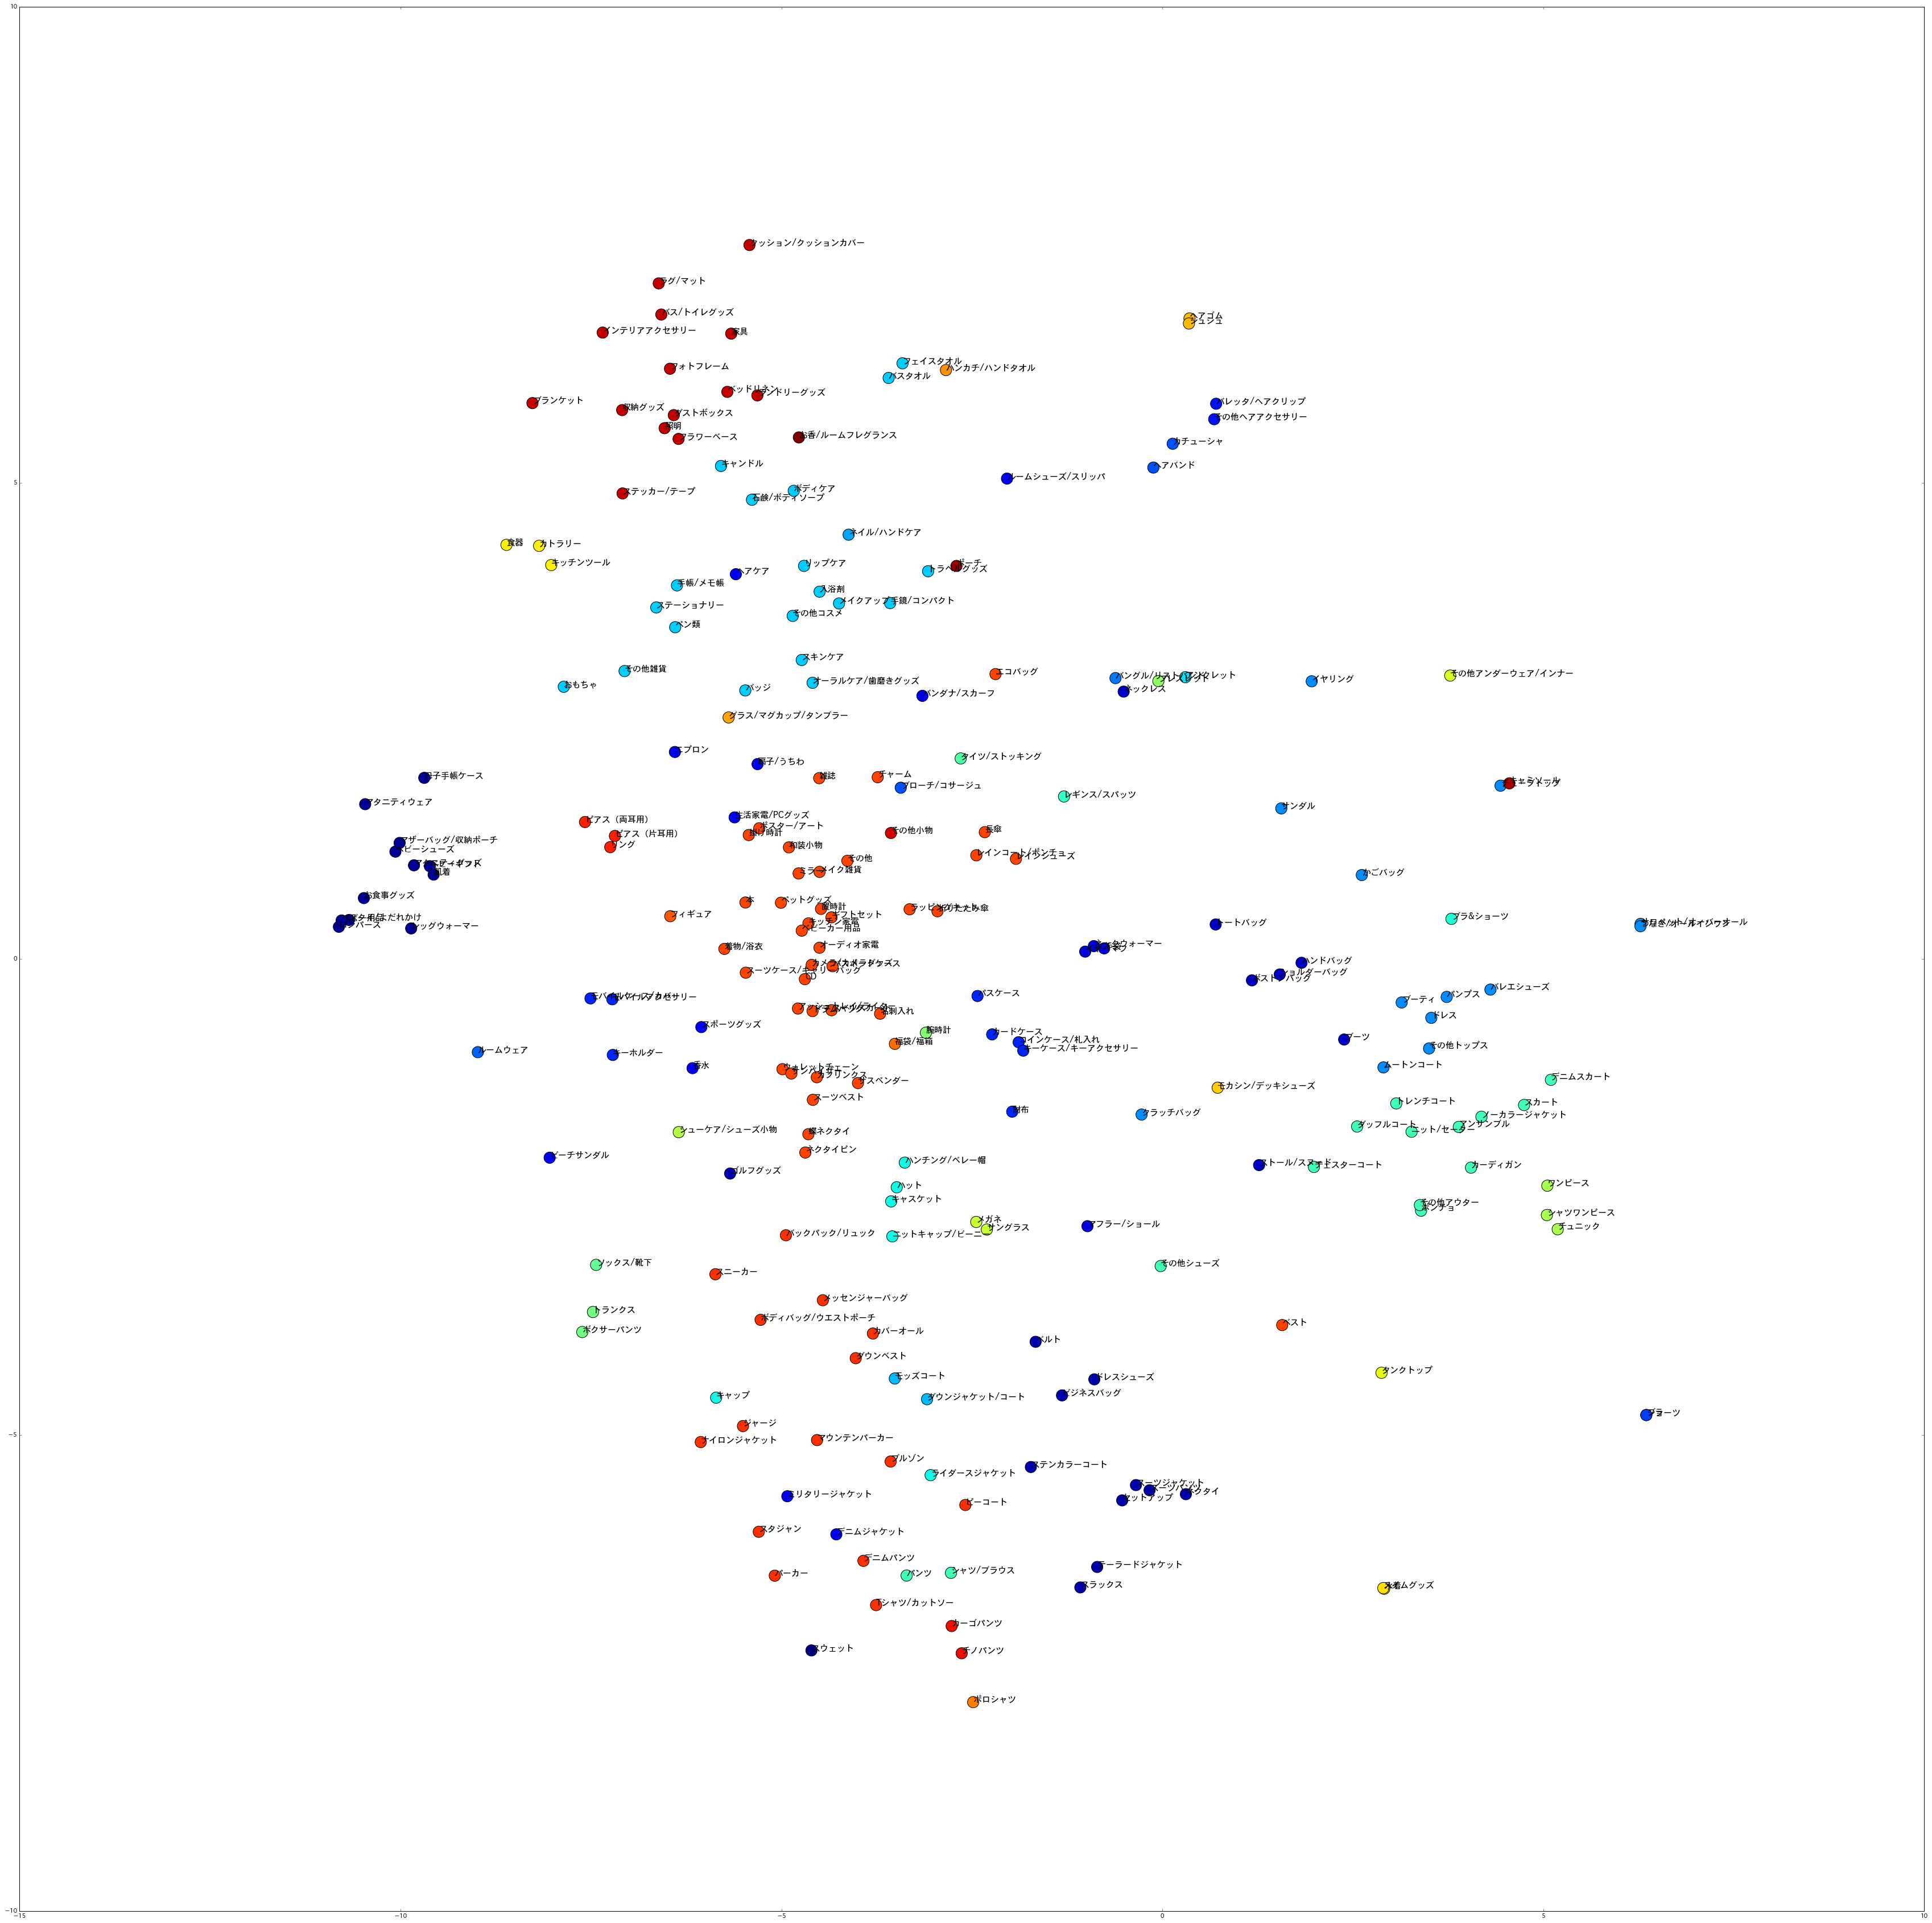

In [54]:
run_tSNE(LEARNING_RATE=100)

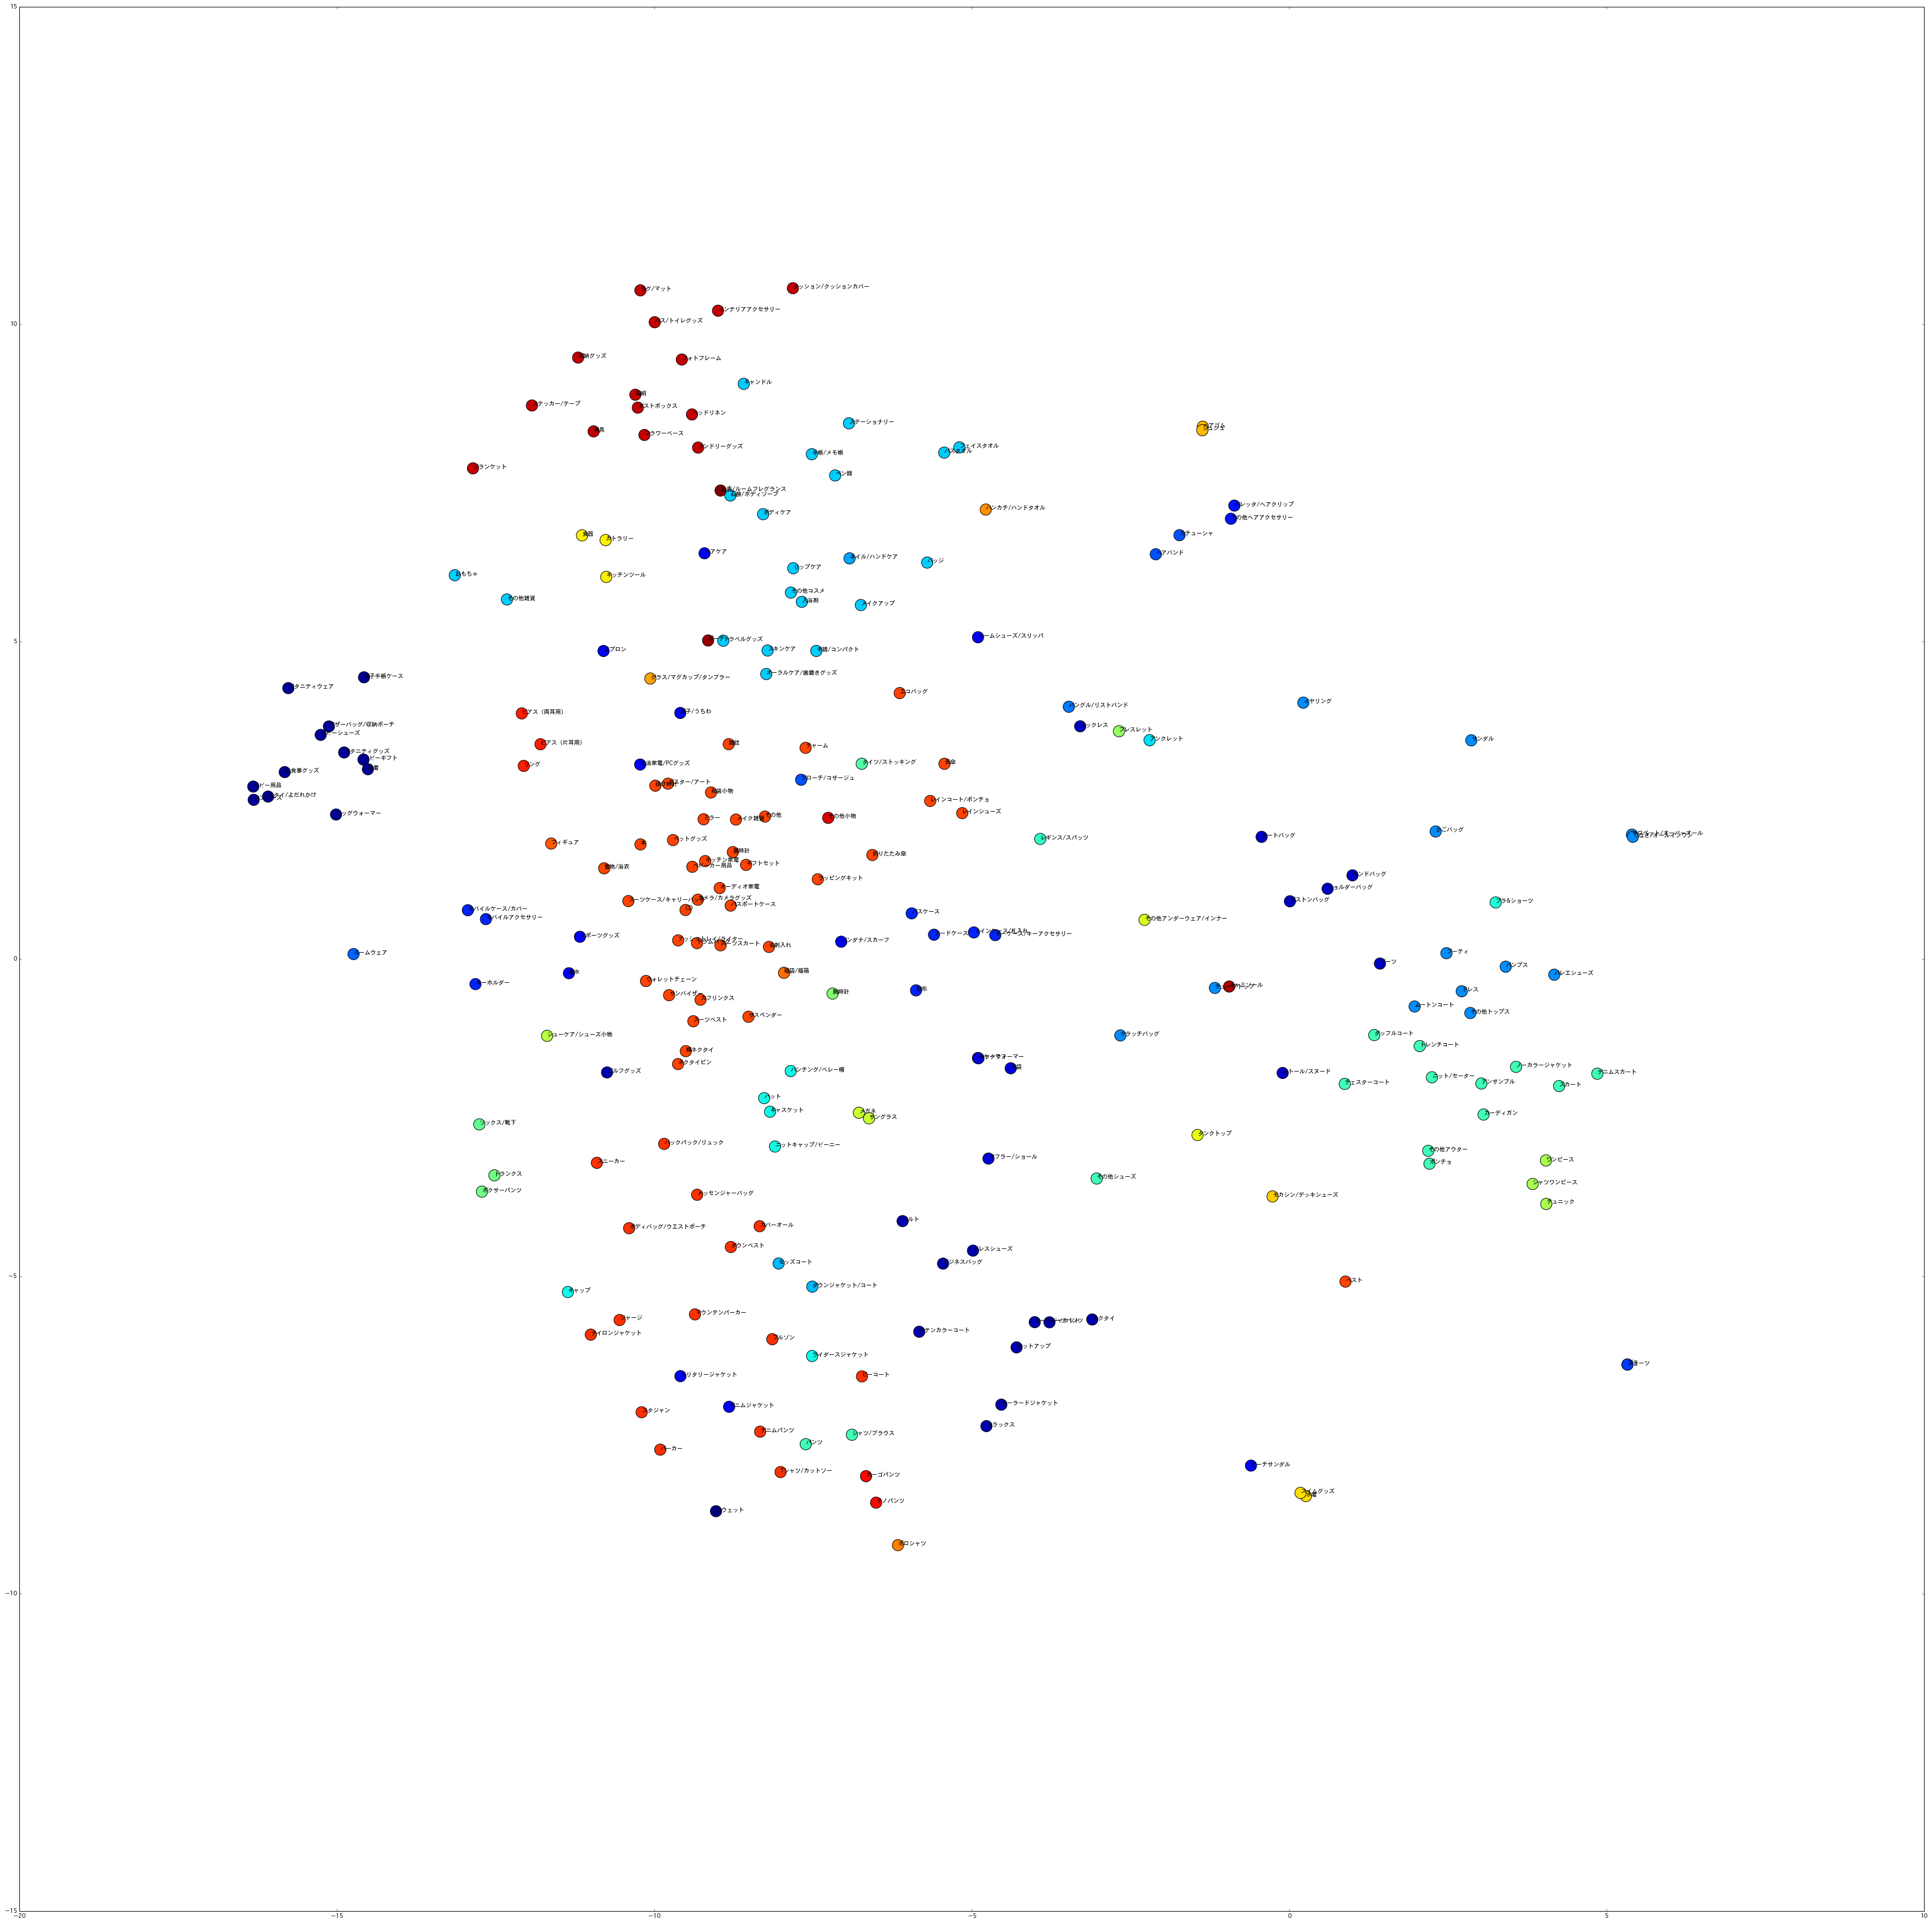

In [36]:
run_tSNE(LEARNING_RATE=200)

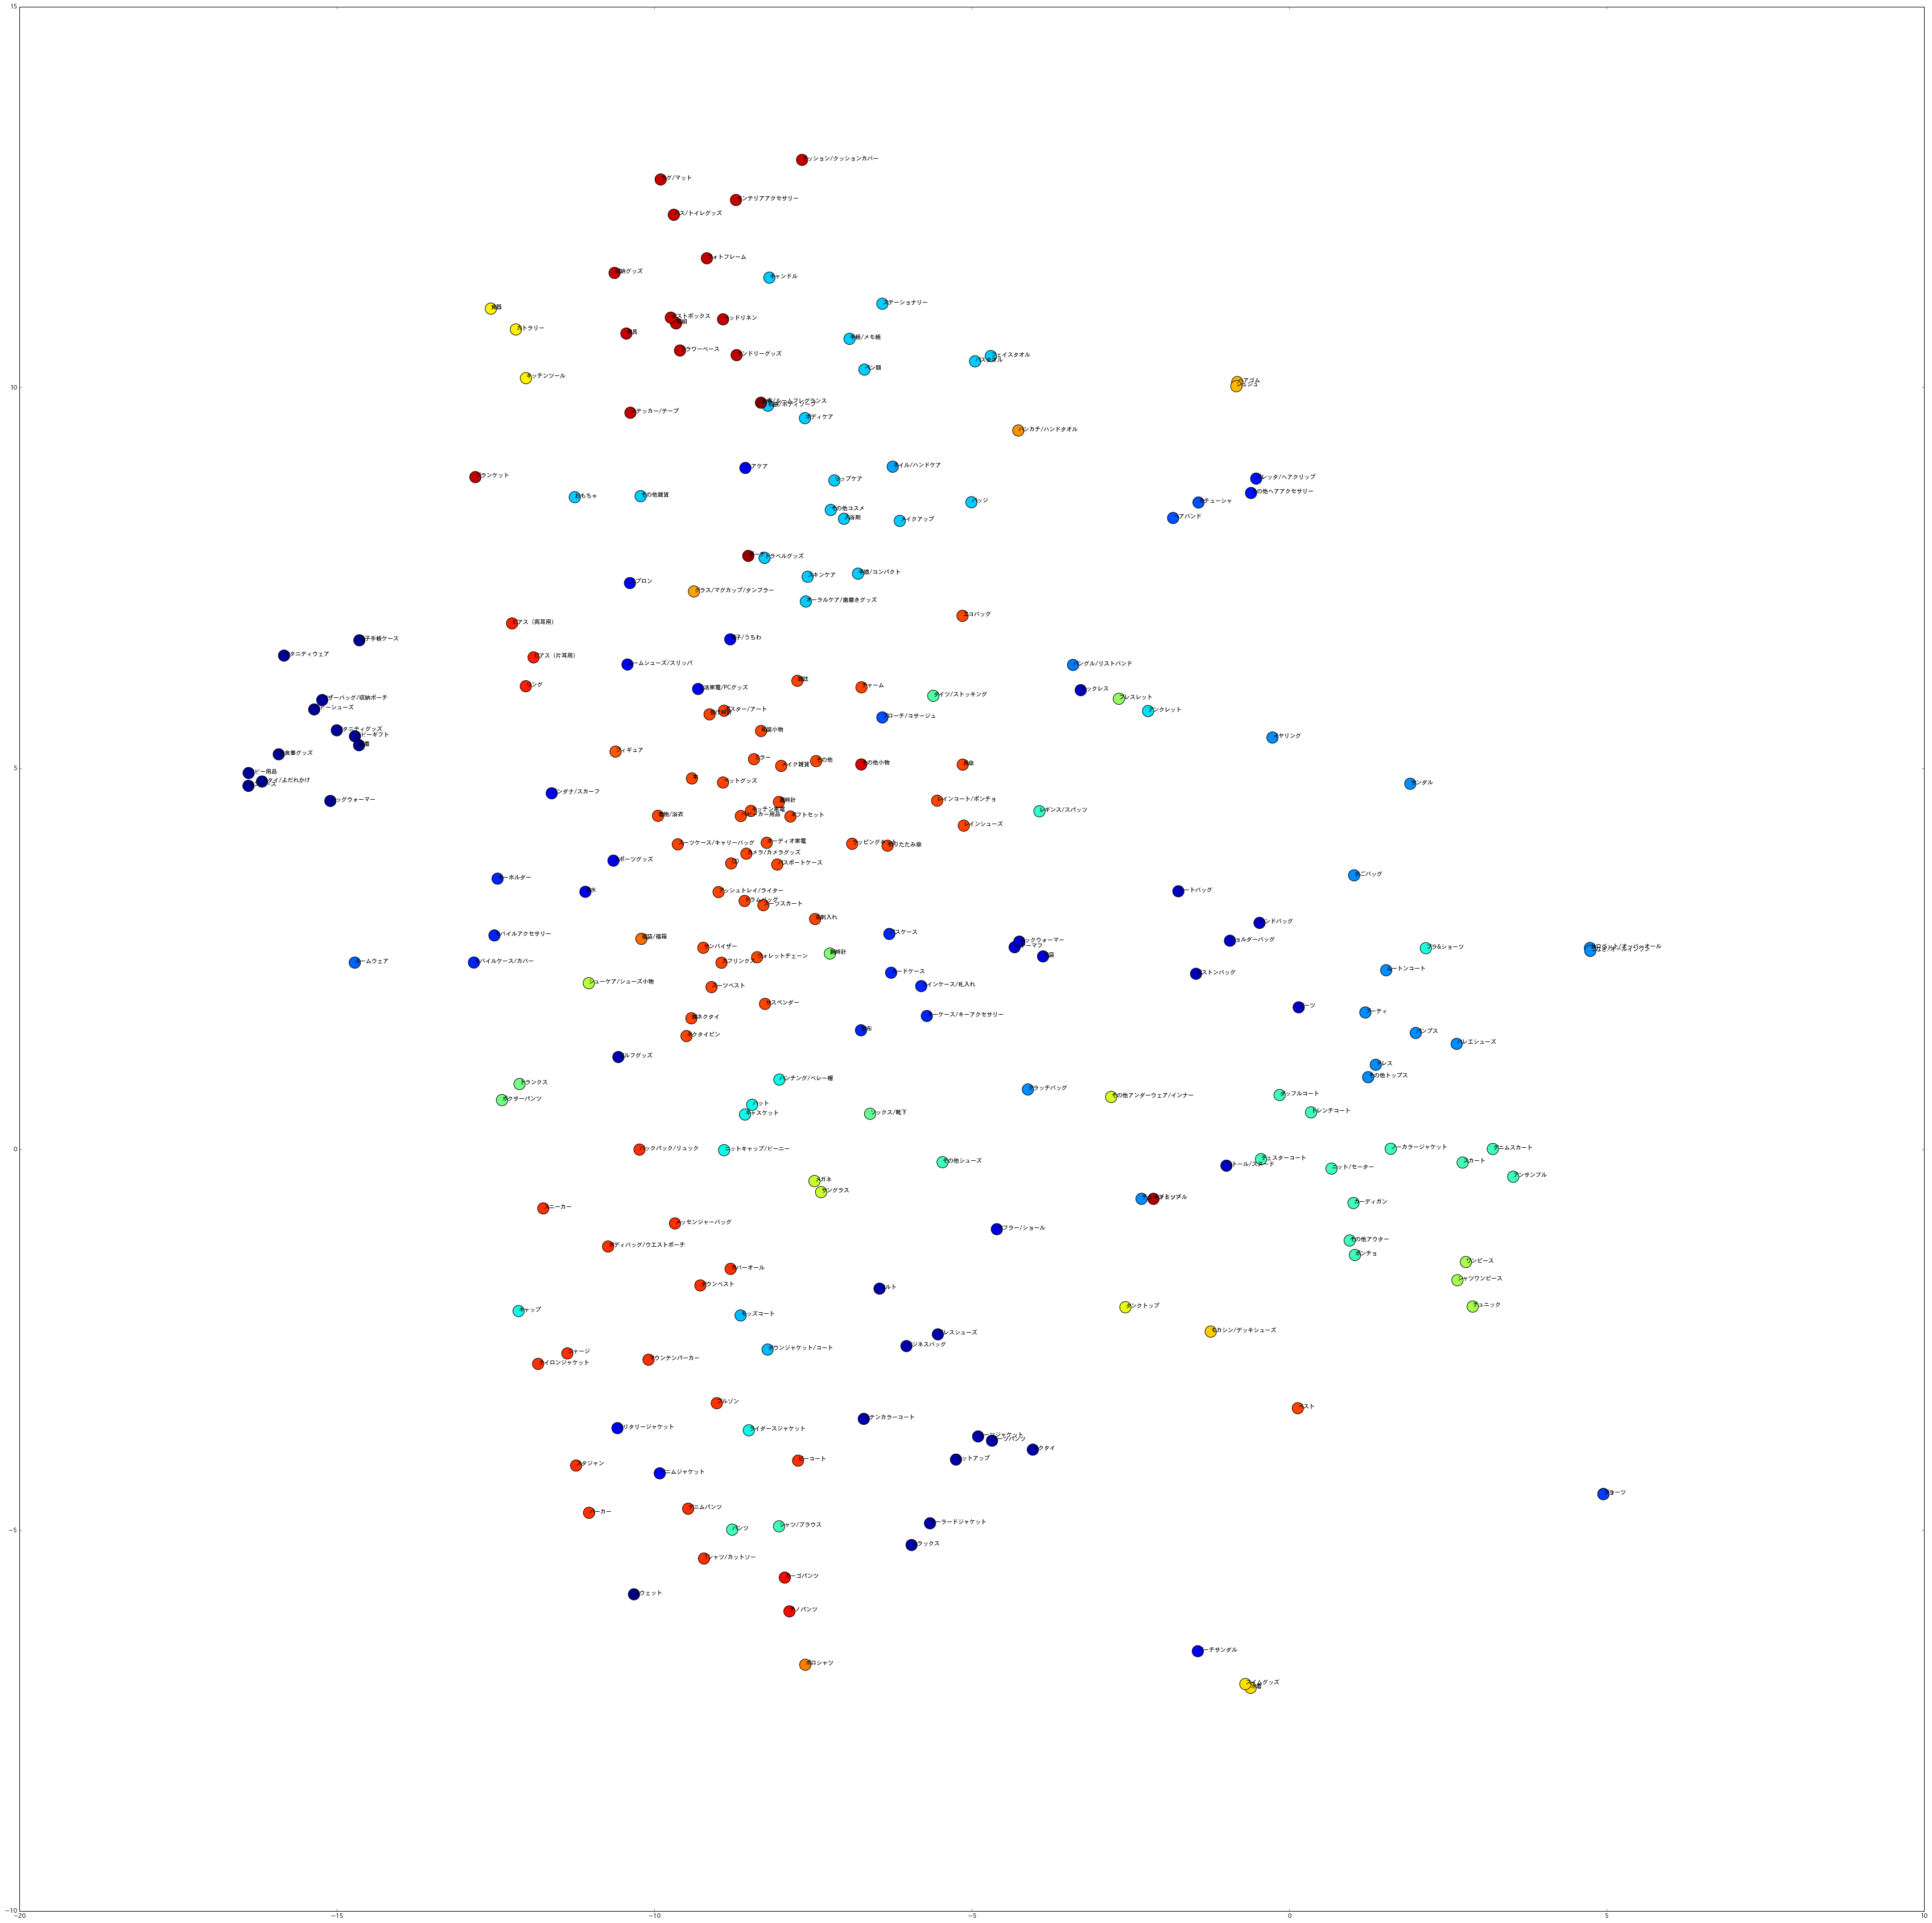

In [37]:
run_tSNE(LEARNING_RATE=300)

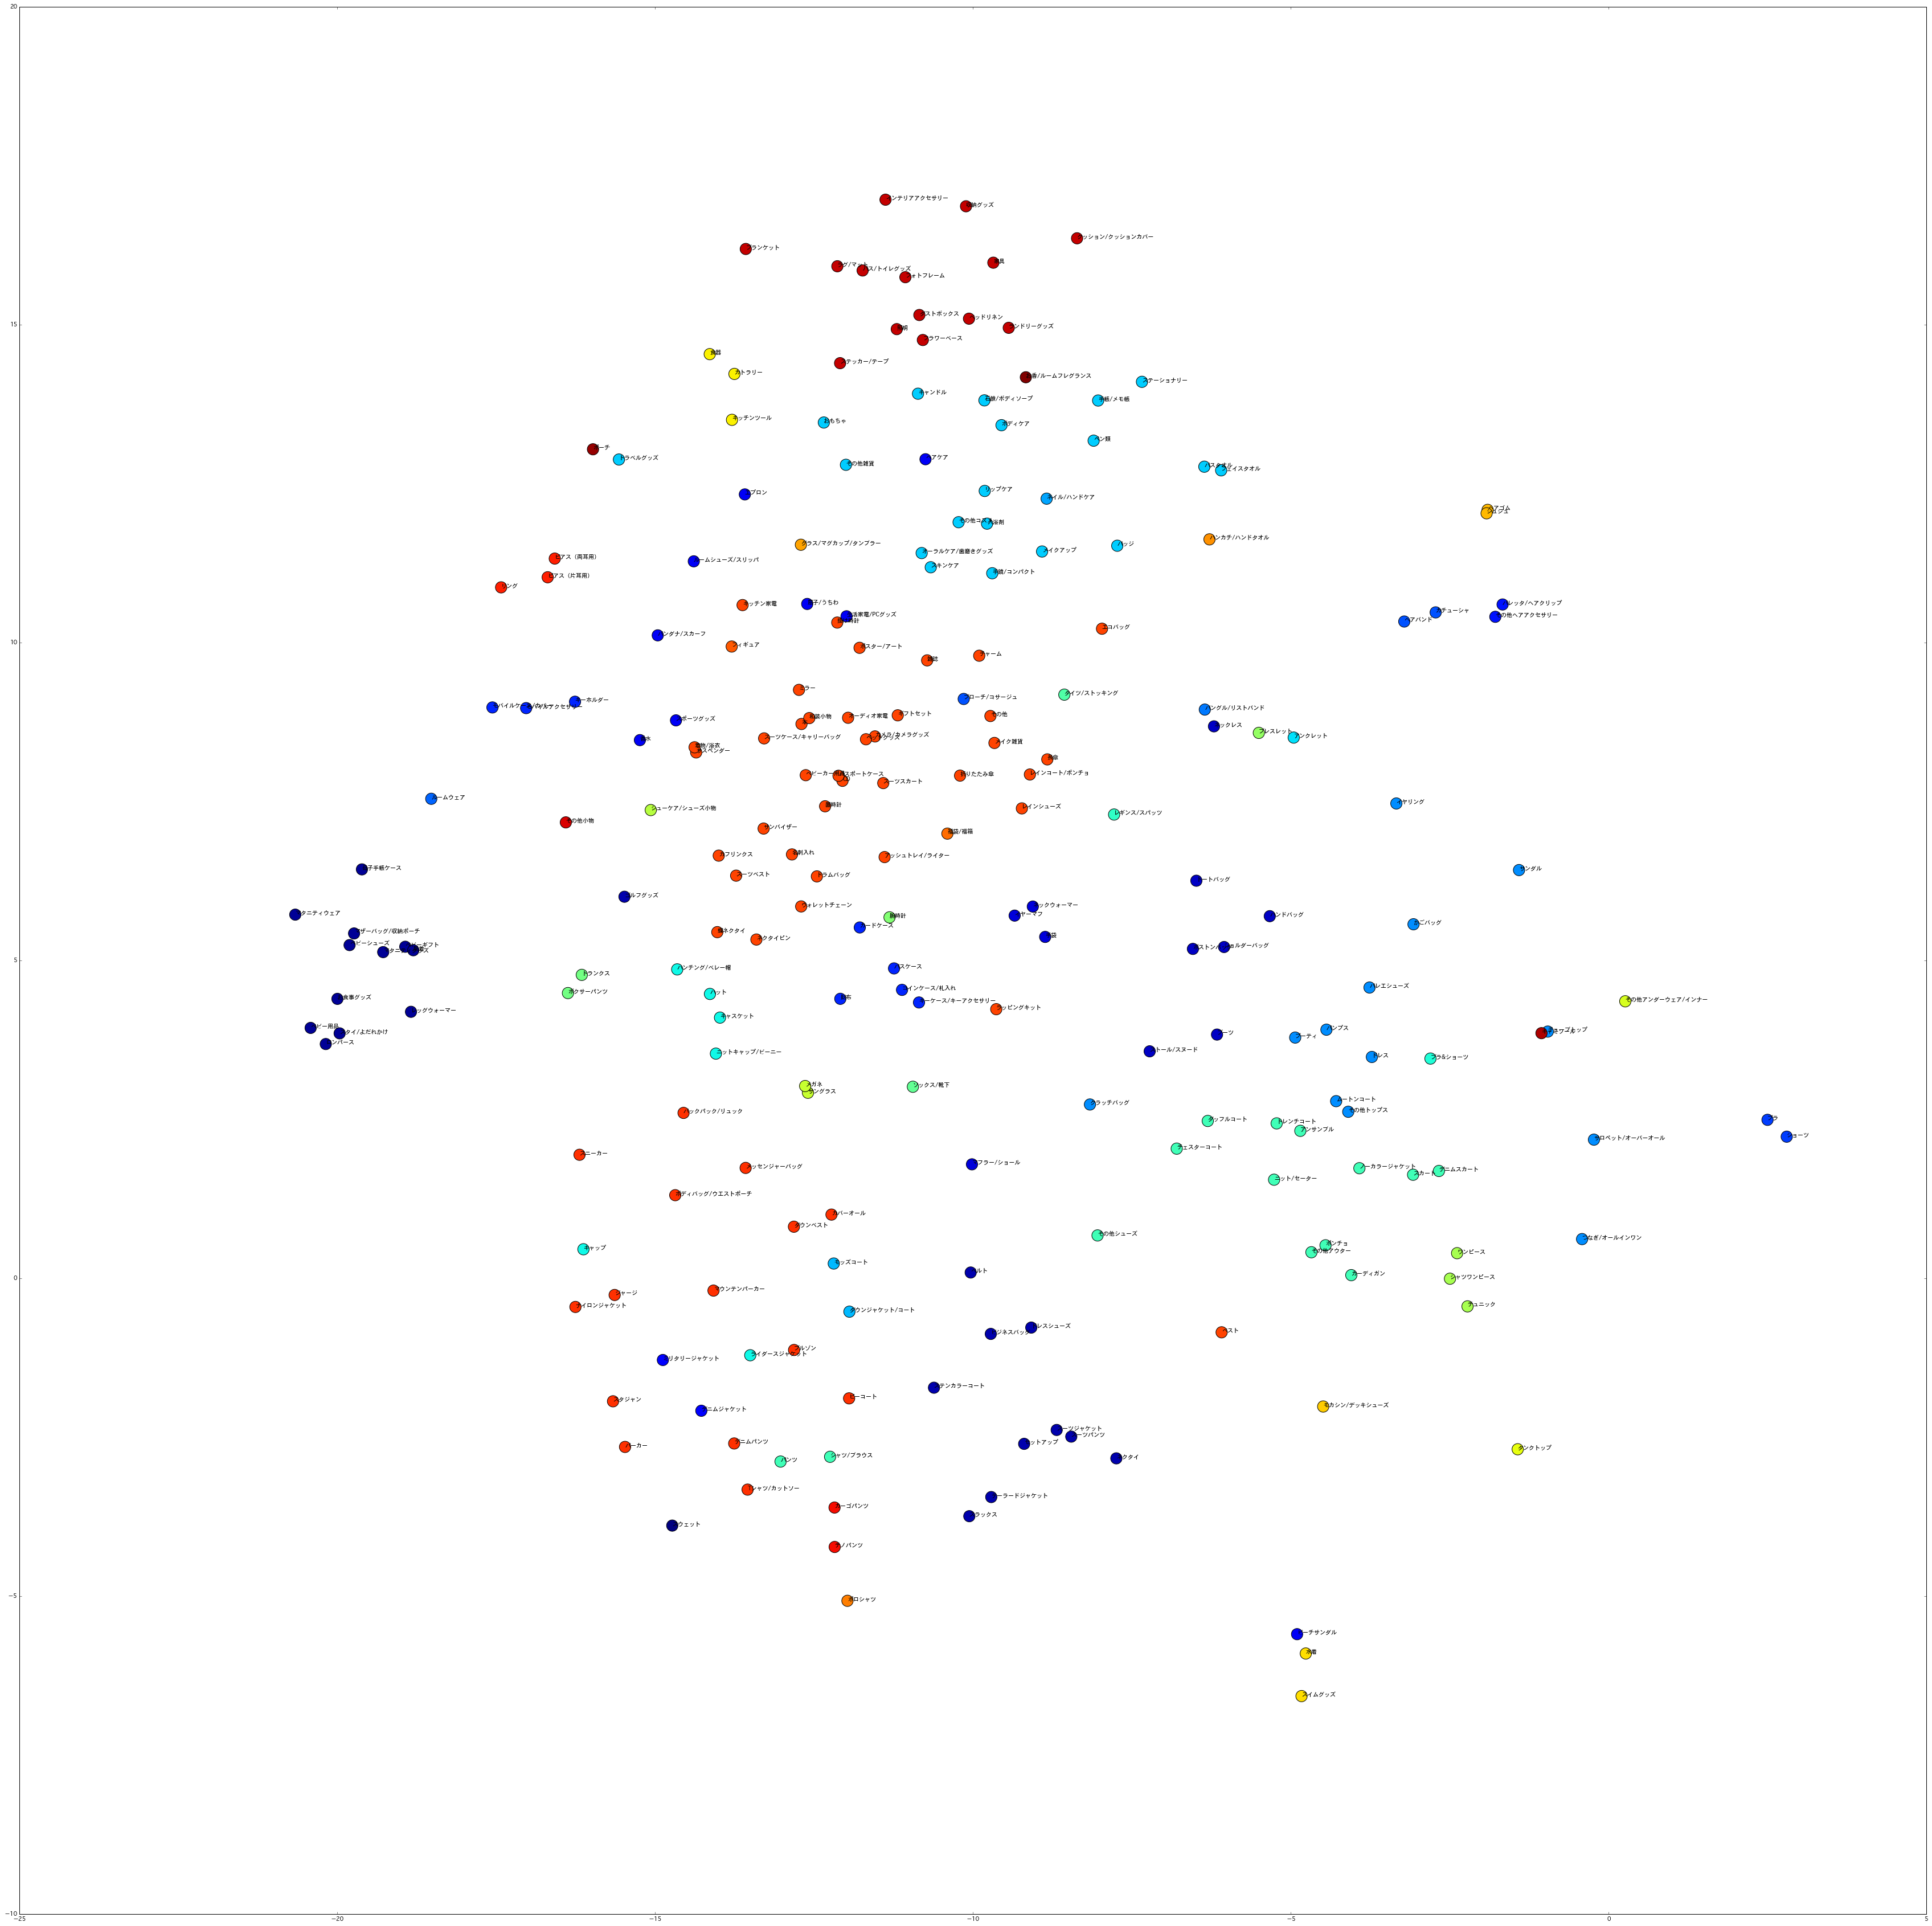

In [38]:
run_tSNE(LEARNING_RATE=400)

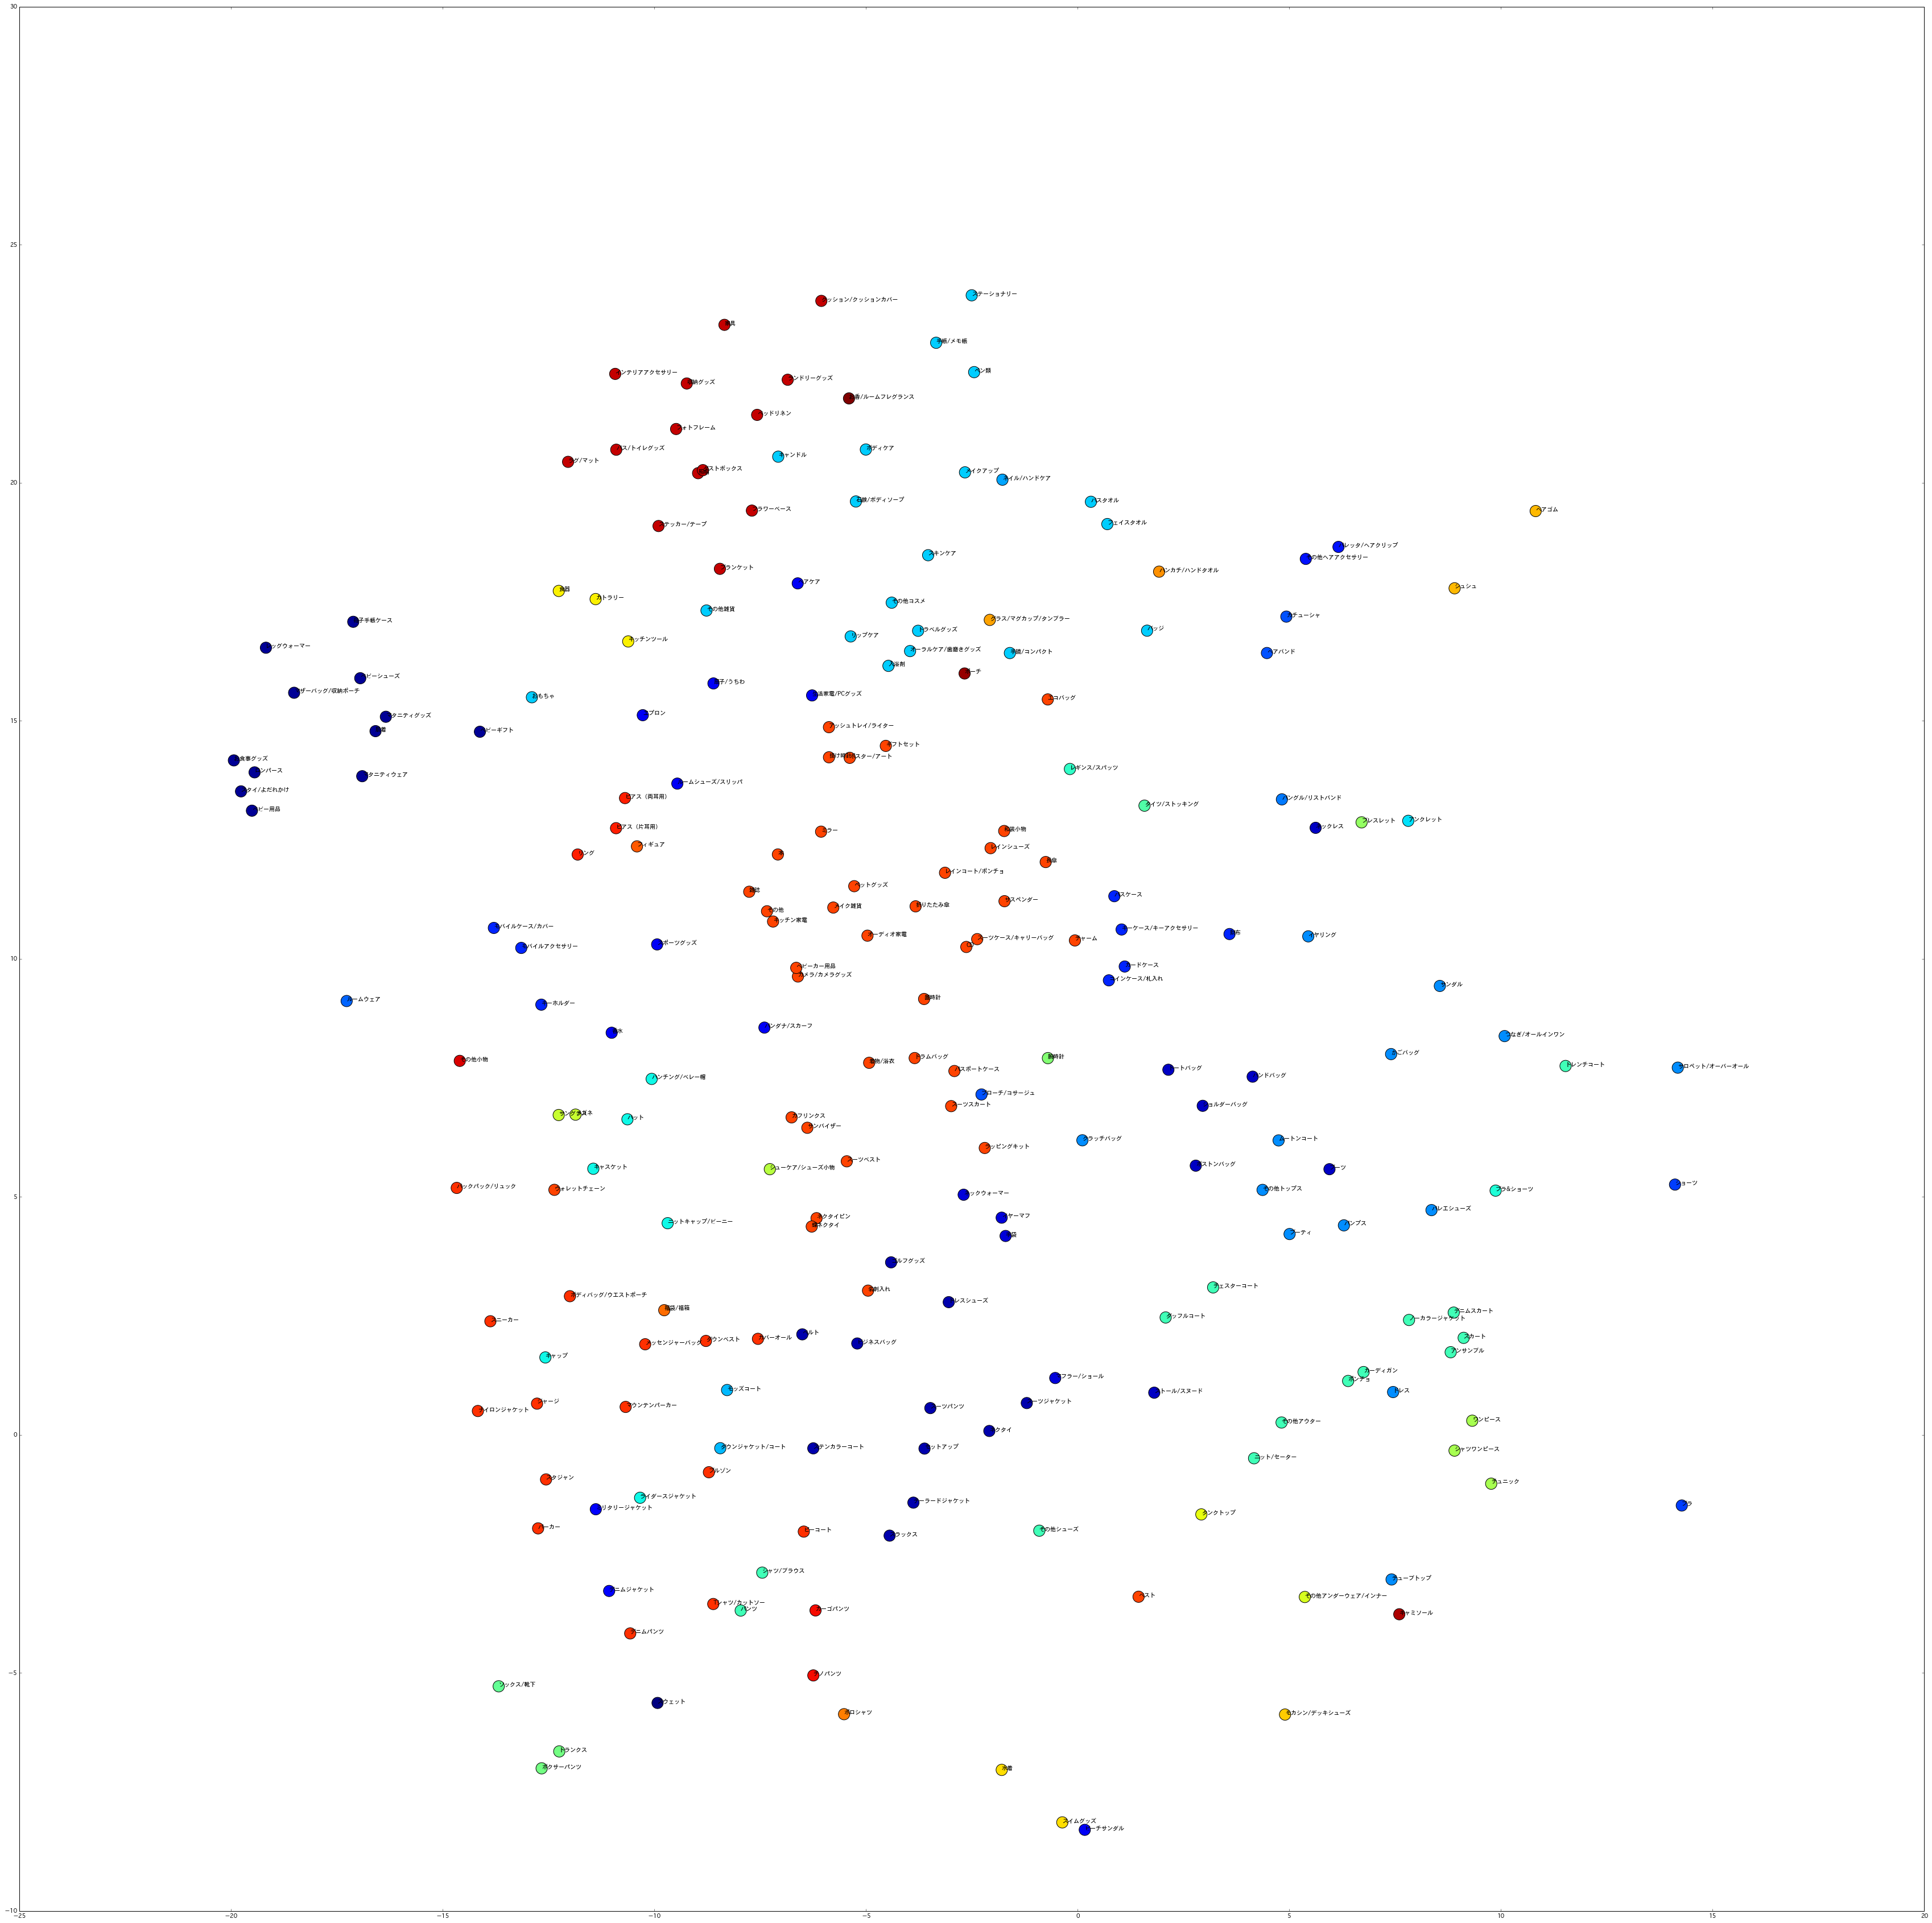

In [39]:
run_tSNE(LEARNING_RATE=500)

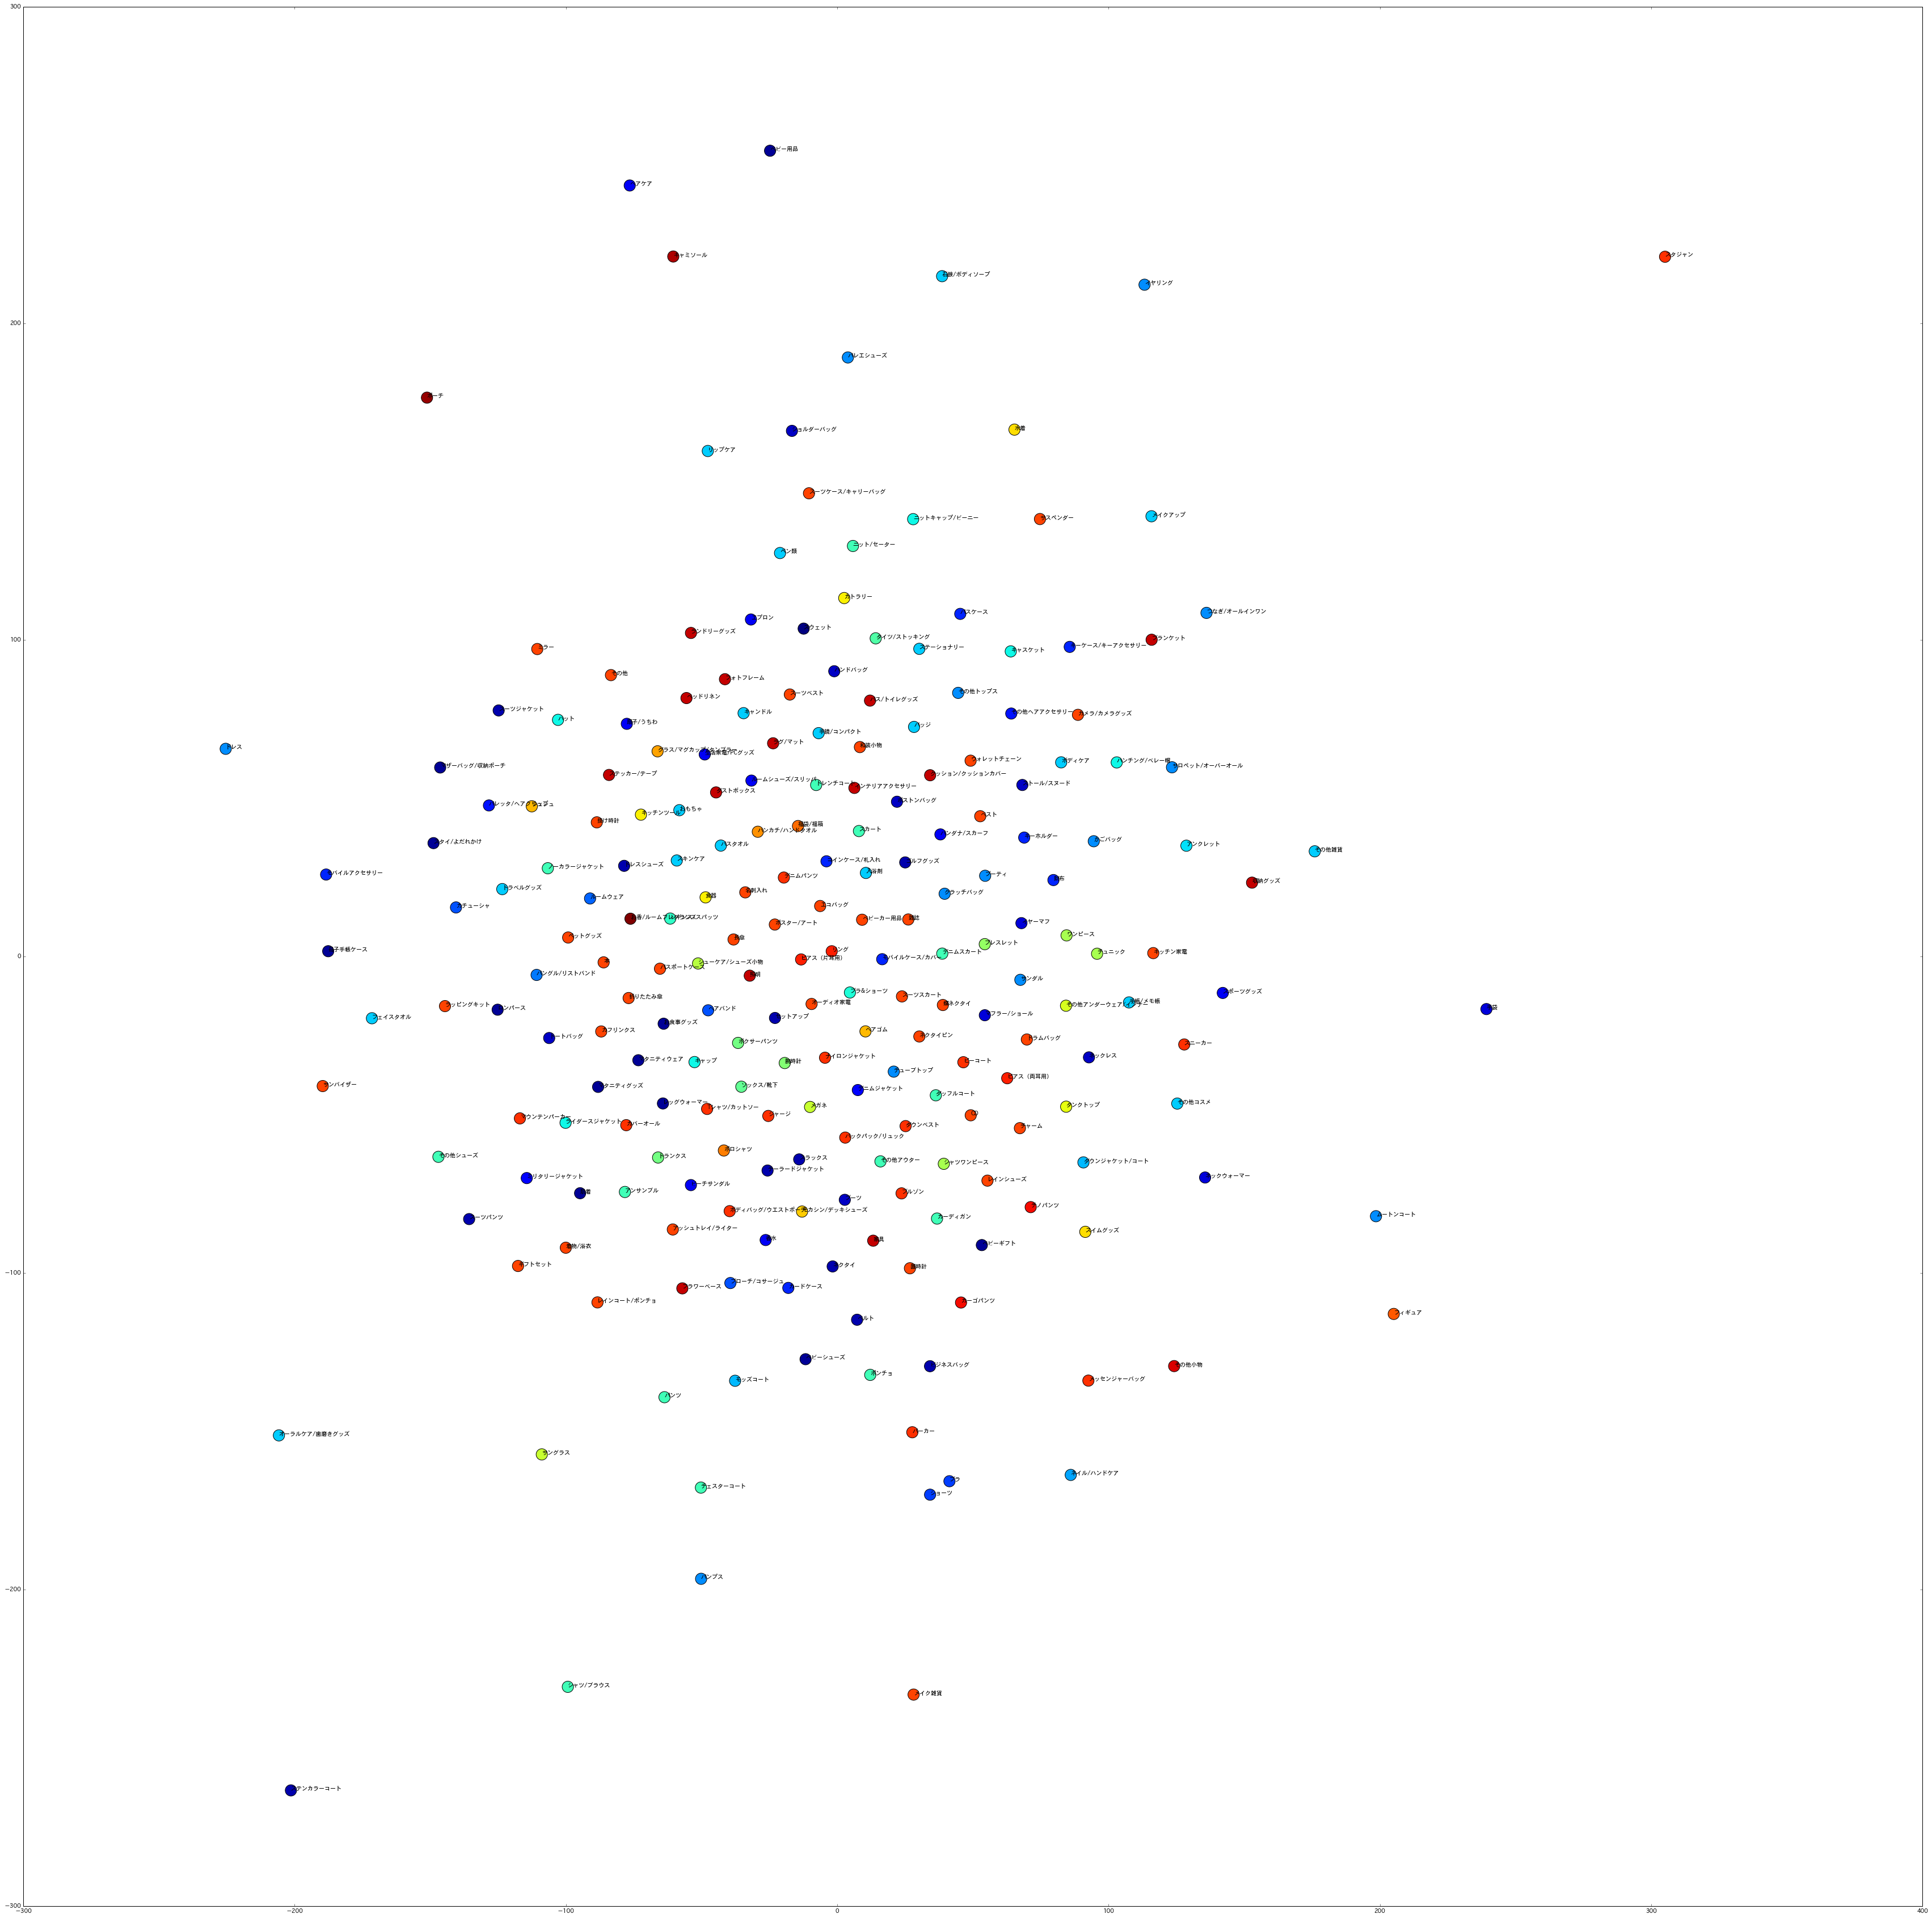

In [40]:
run_tSNE(LEARNING_RATE=1000)

### イテレーション回数を変えてみる（learning_rate=300)

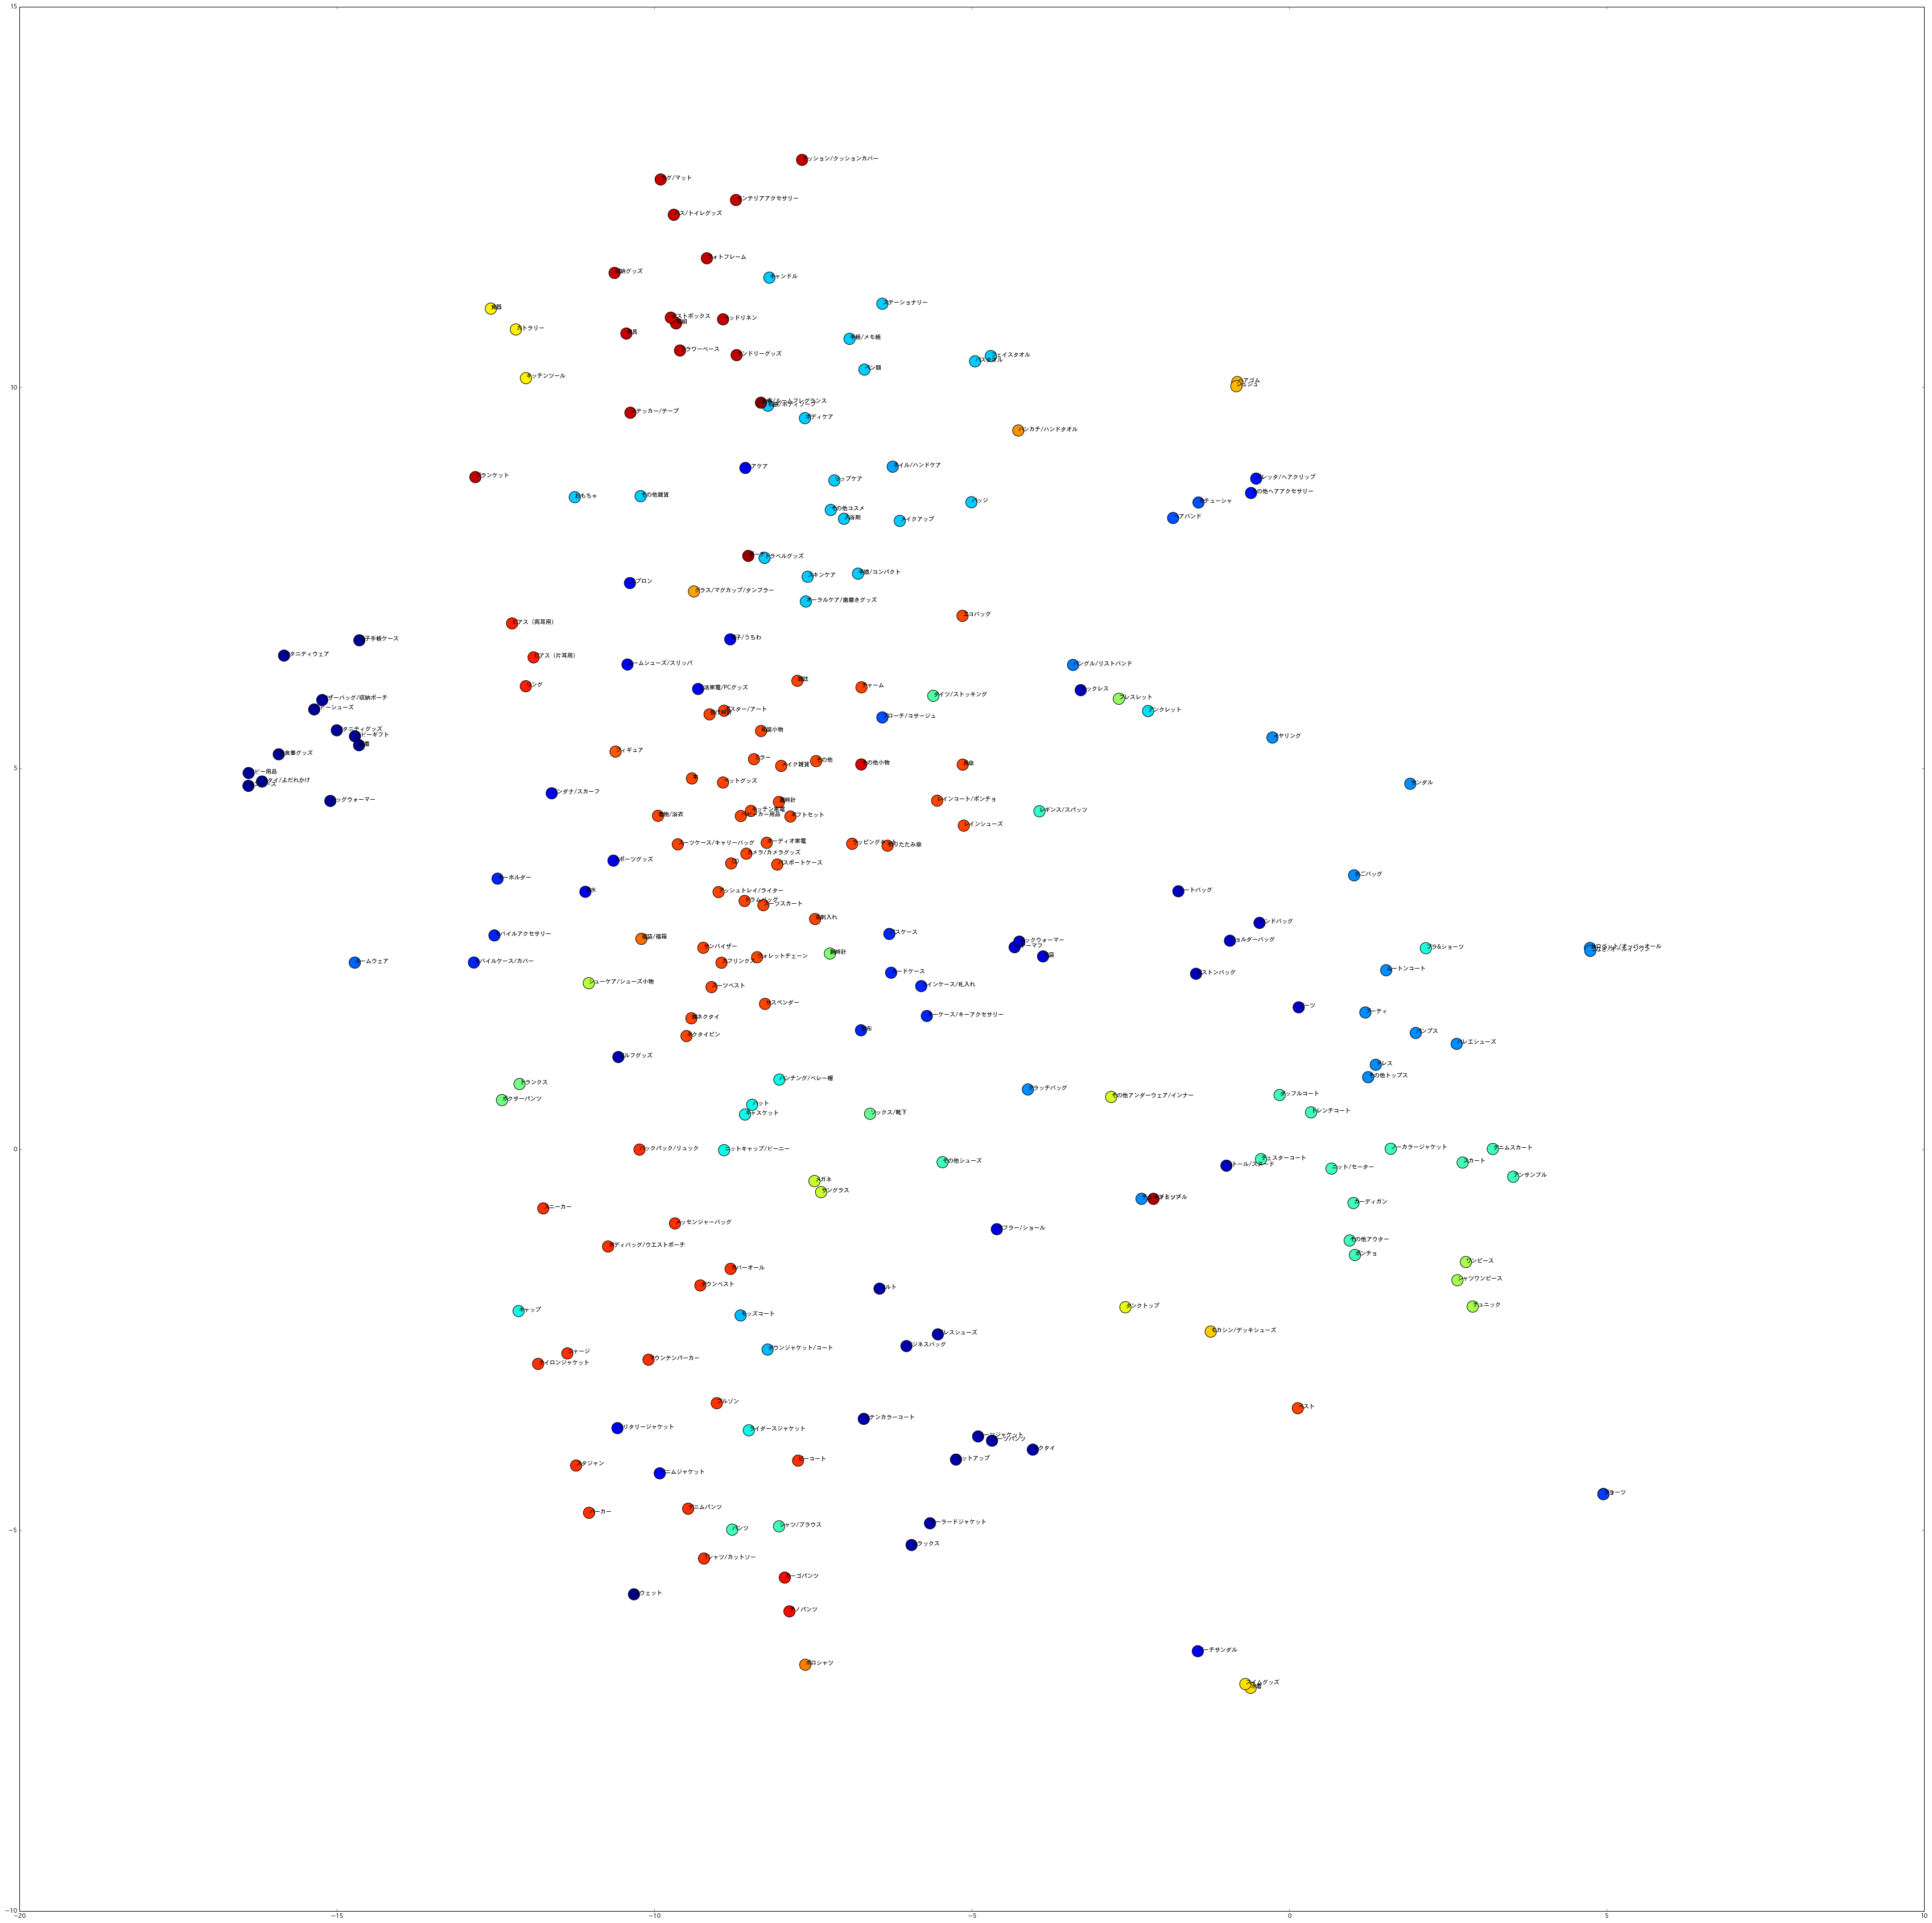

In [41]:
run_tSNE(LEARNING_RATE=300, N_ITER=1000)

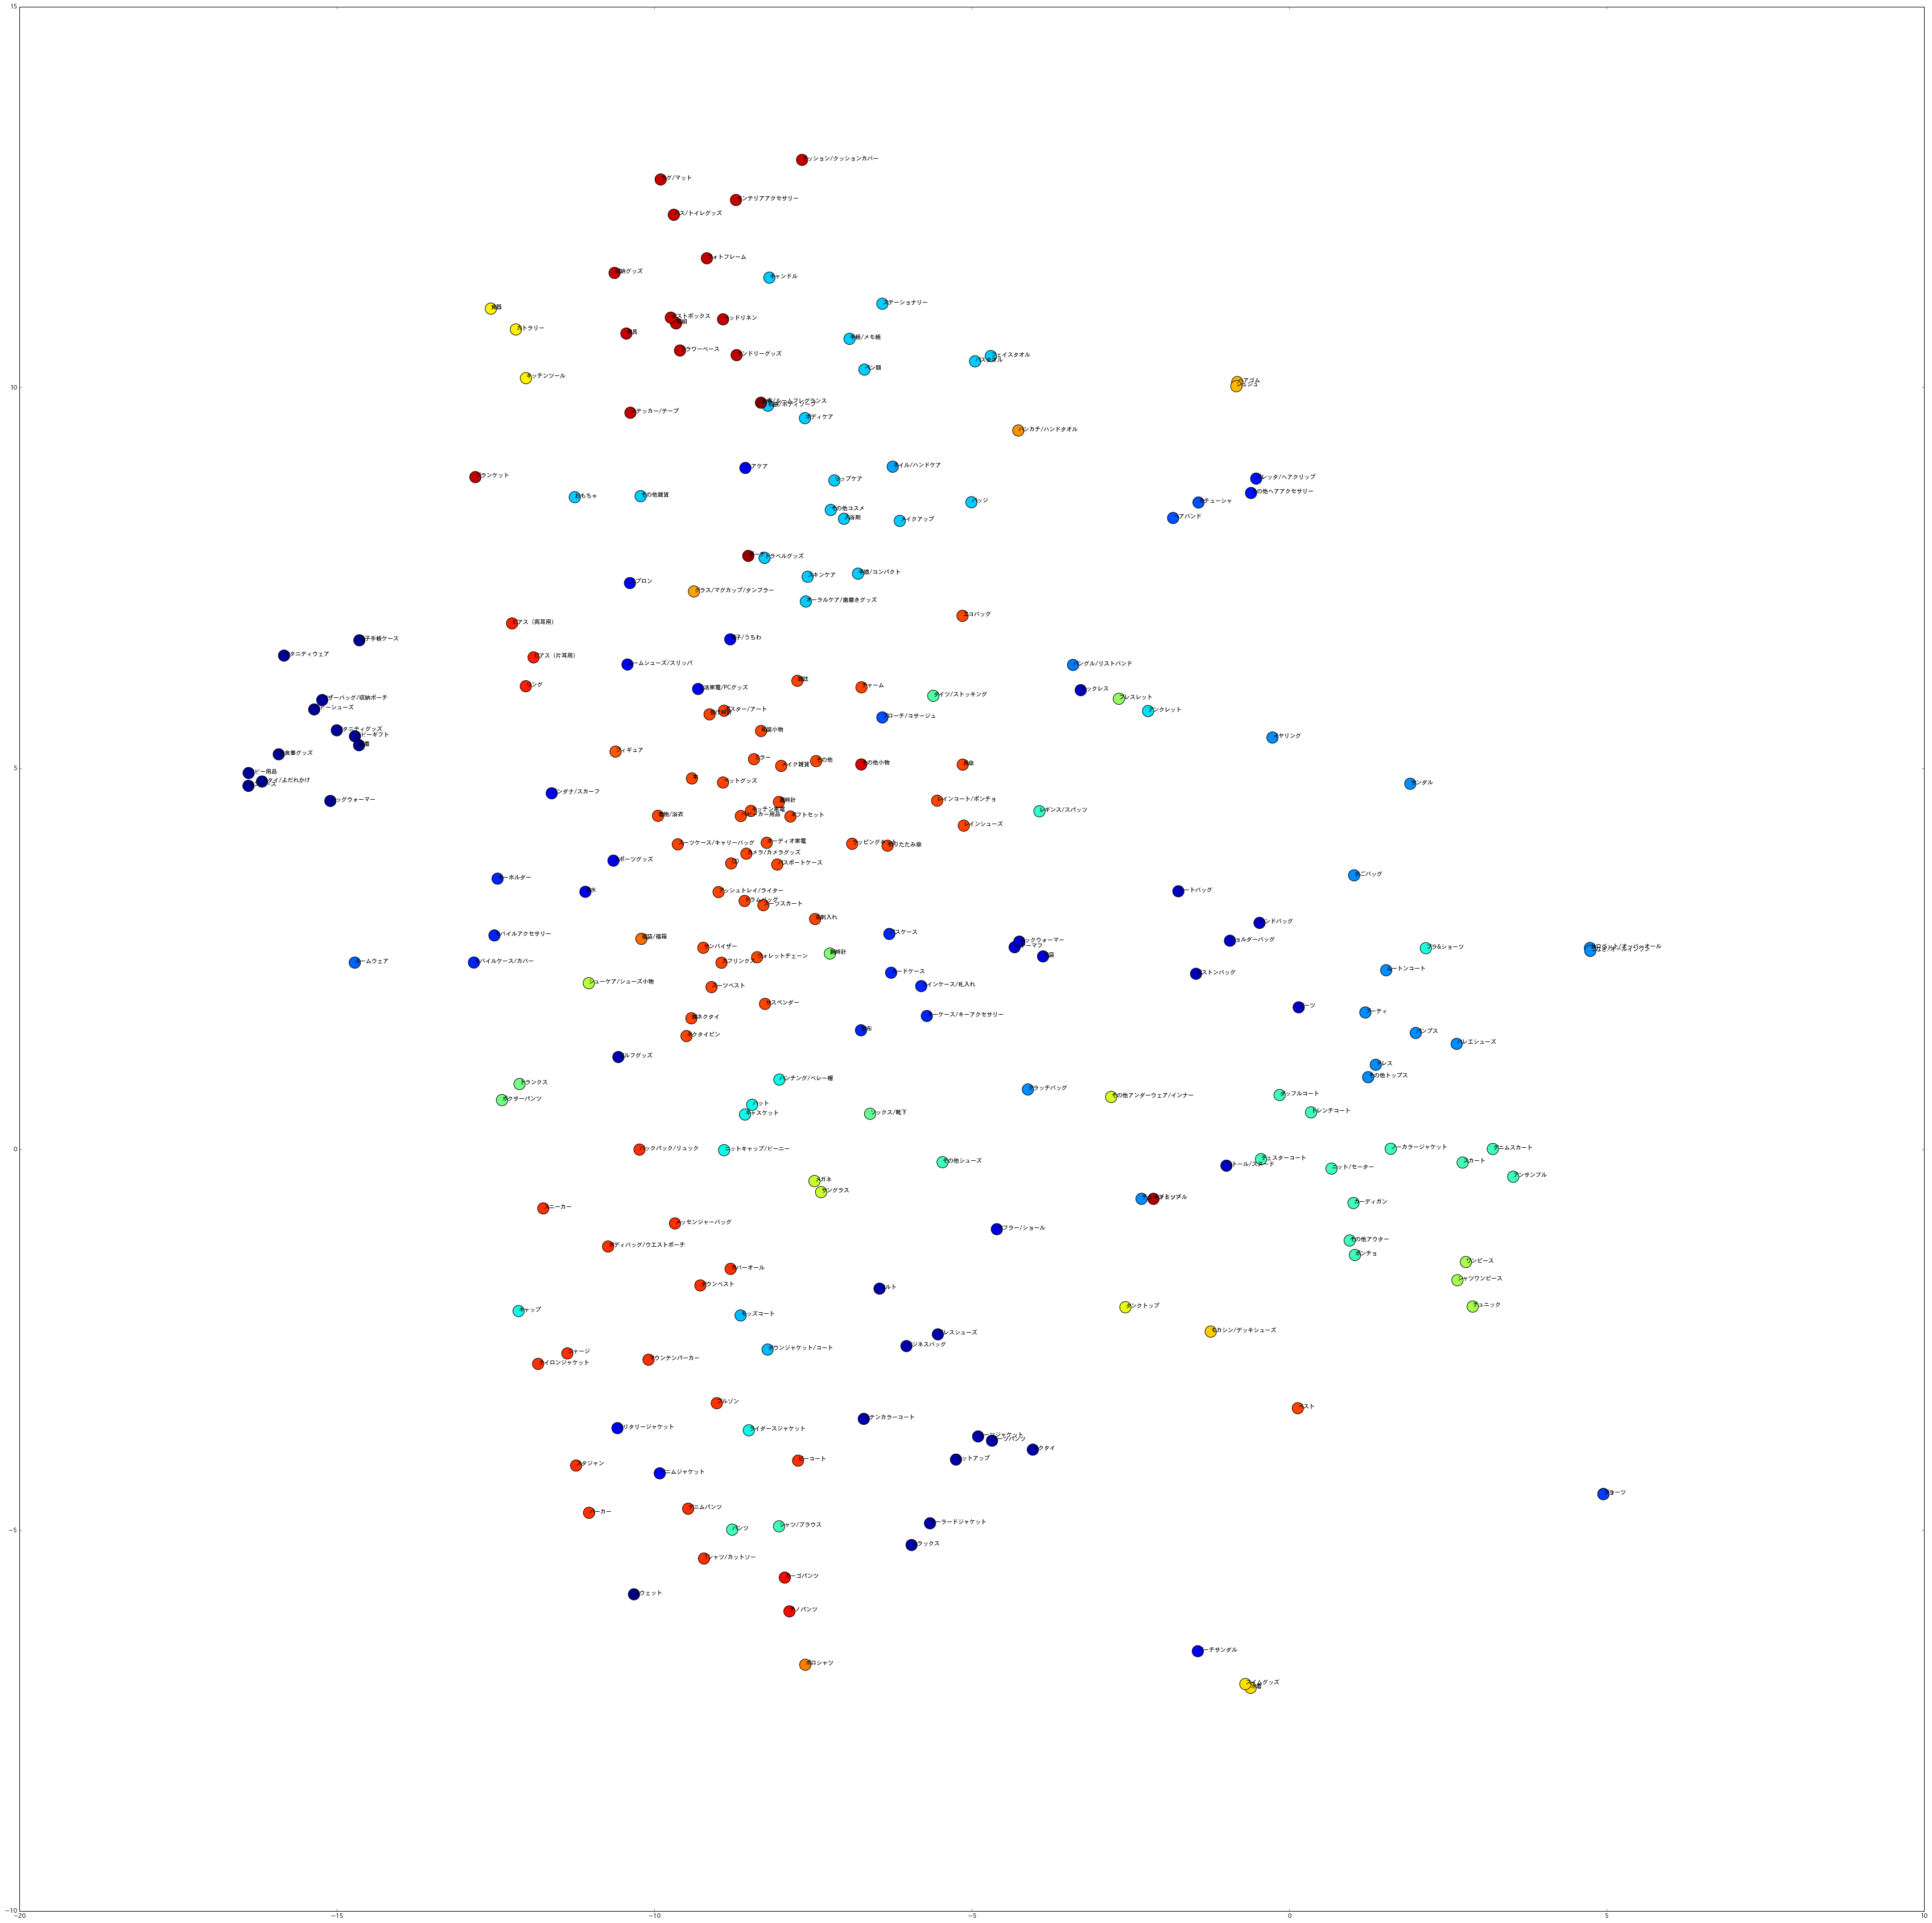

In [42]:
run_tSNE(LEARNING_RATE=300, N_ITER=5000)

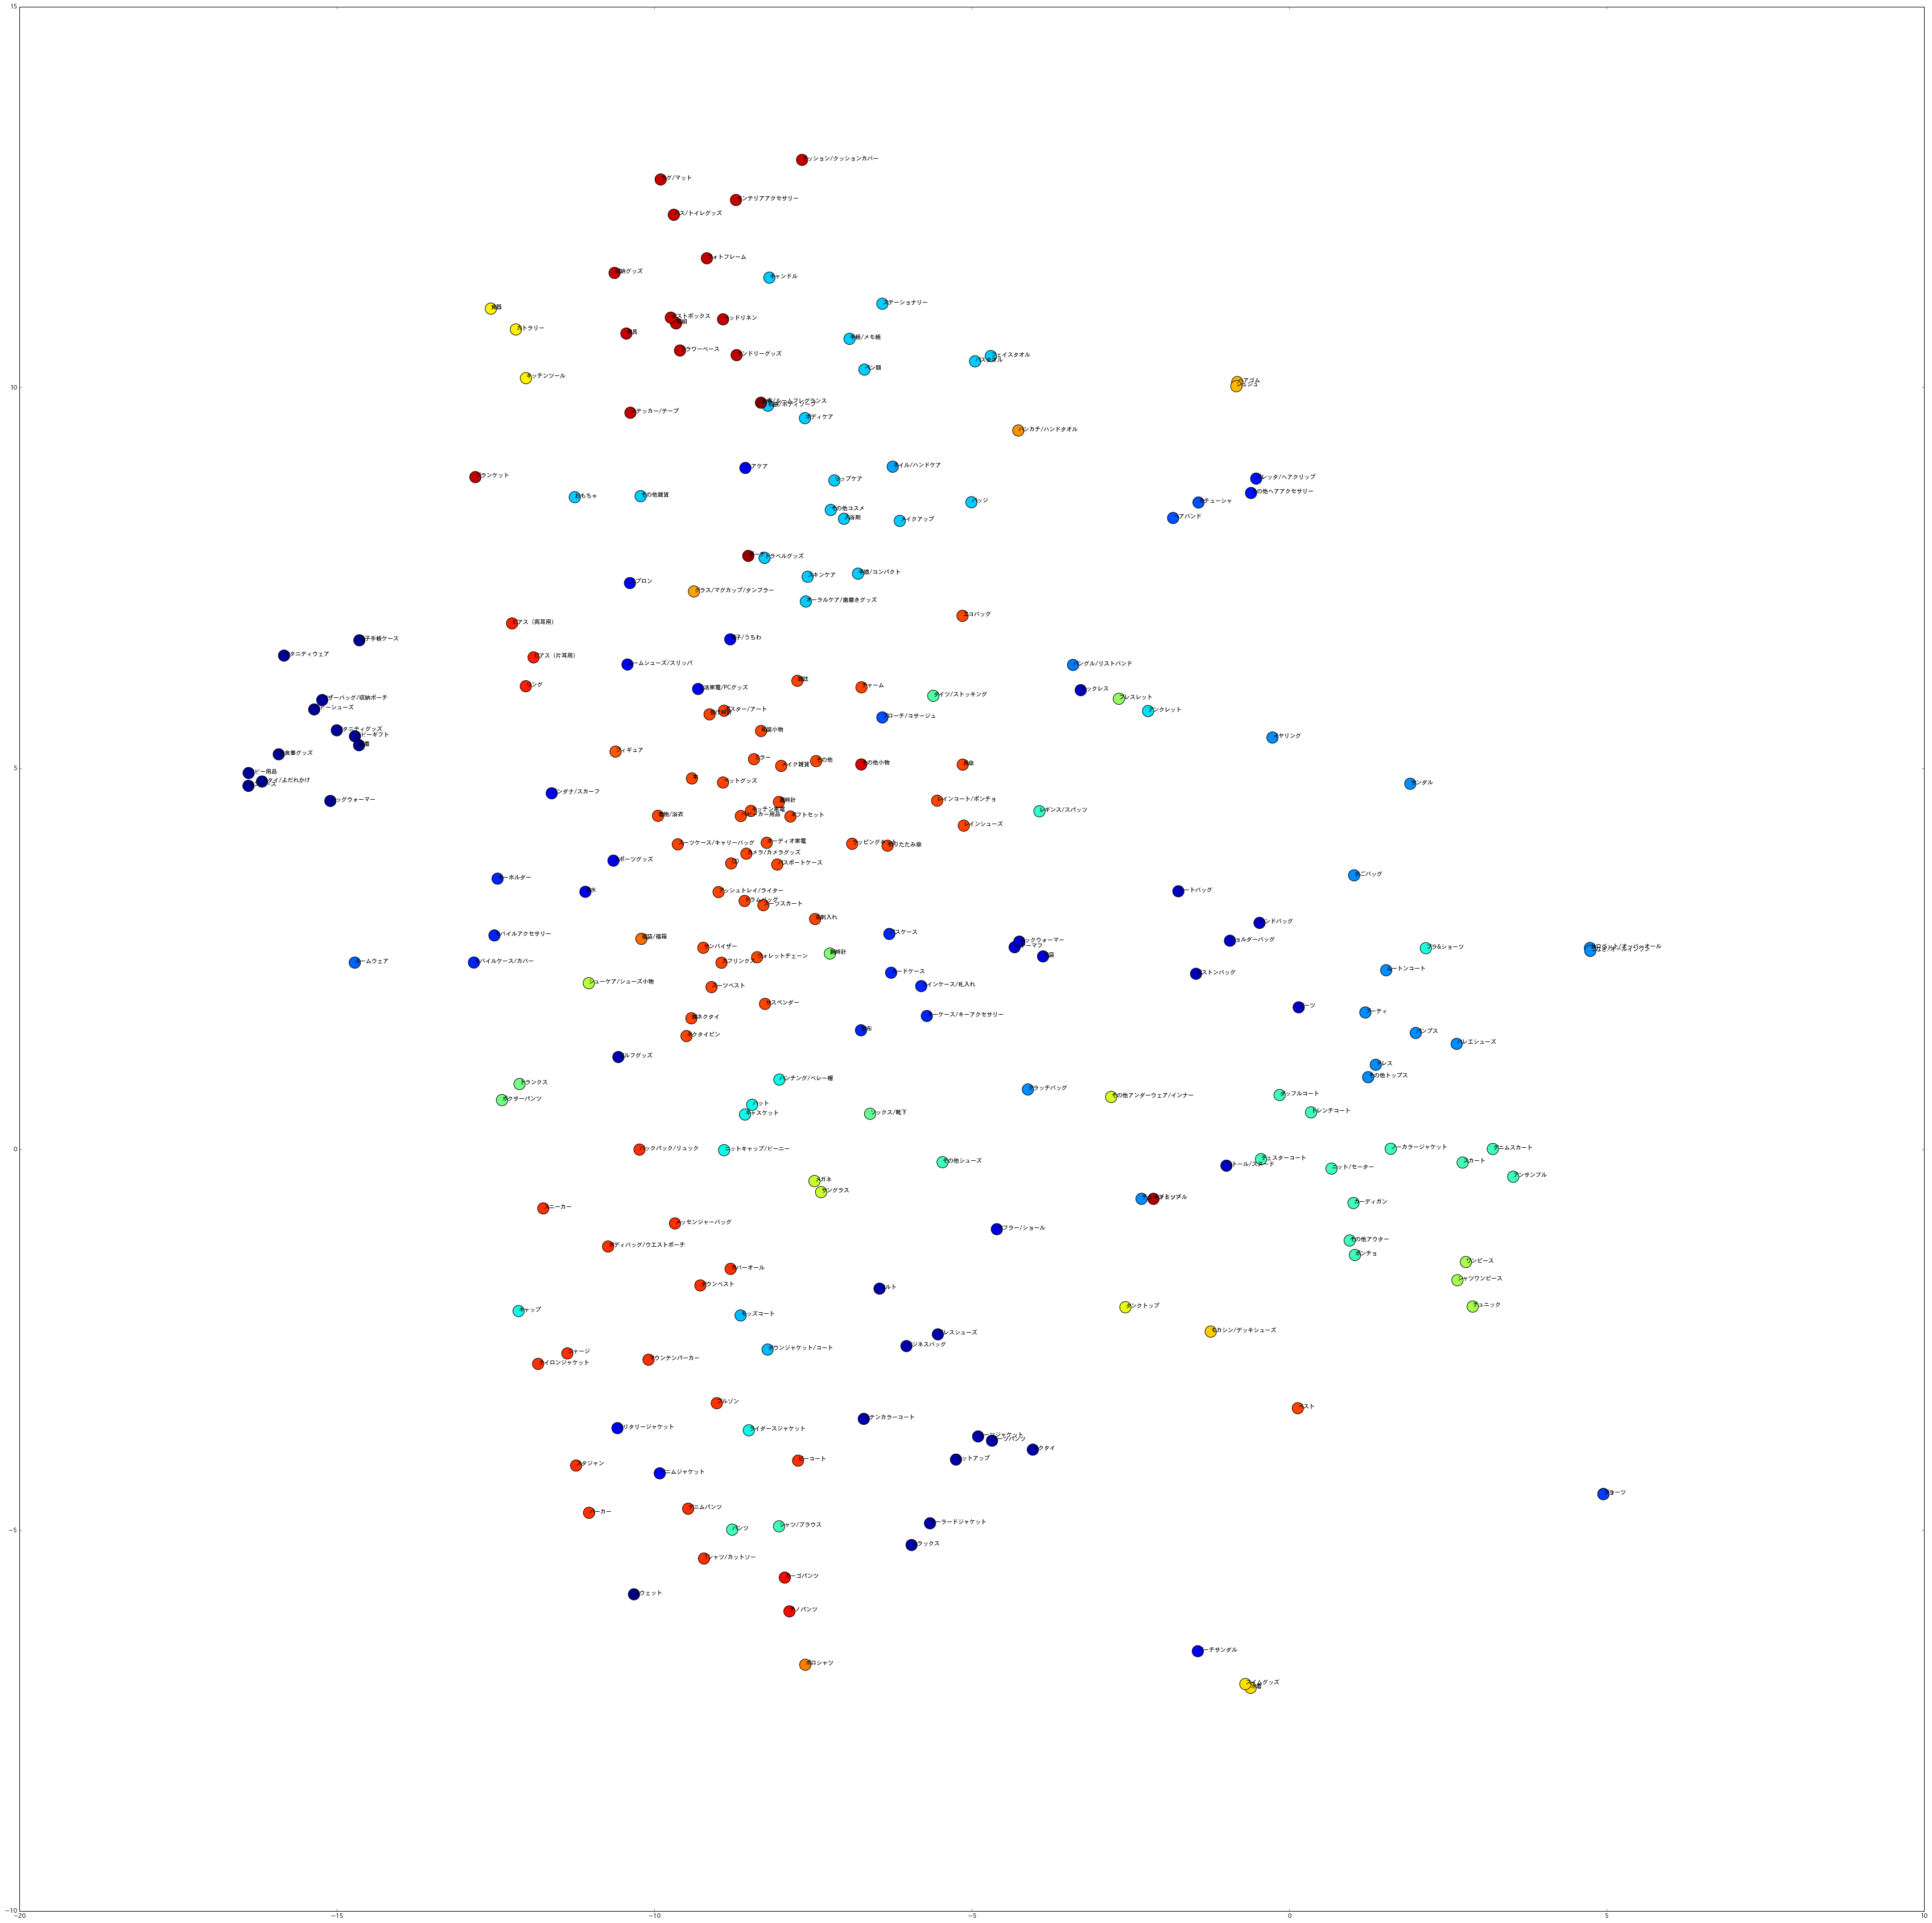

In [43]:
run_tSNE(LEARNING_RATE=300, N_ITER=10000)

なんかあんまし変わんないらしい。

### initを変えてみる（learning_rate=300, n_iter=1000)

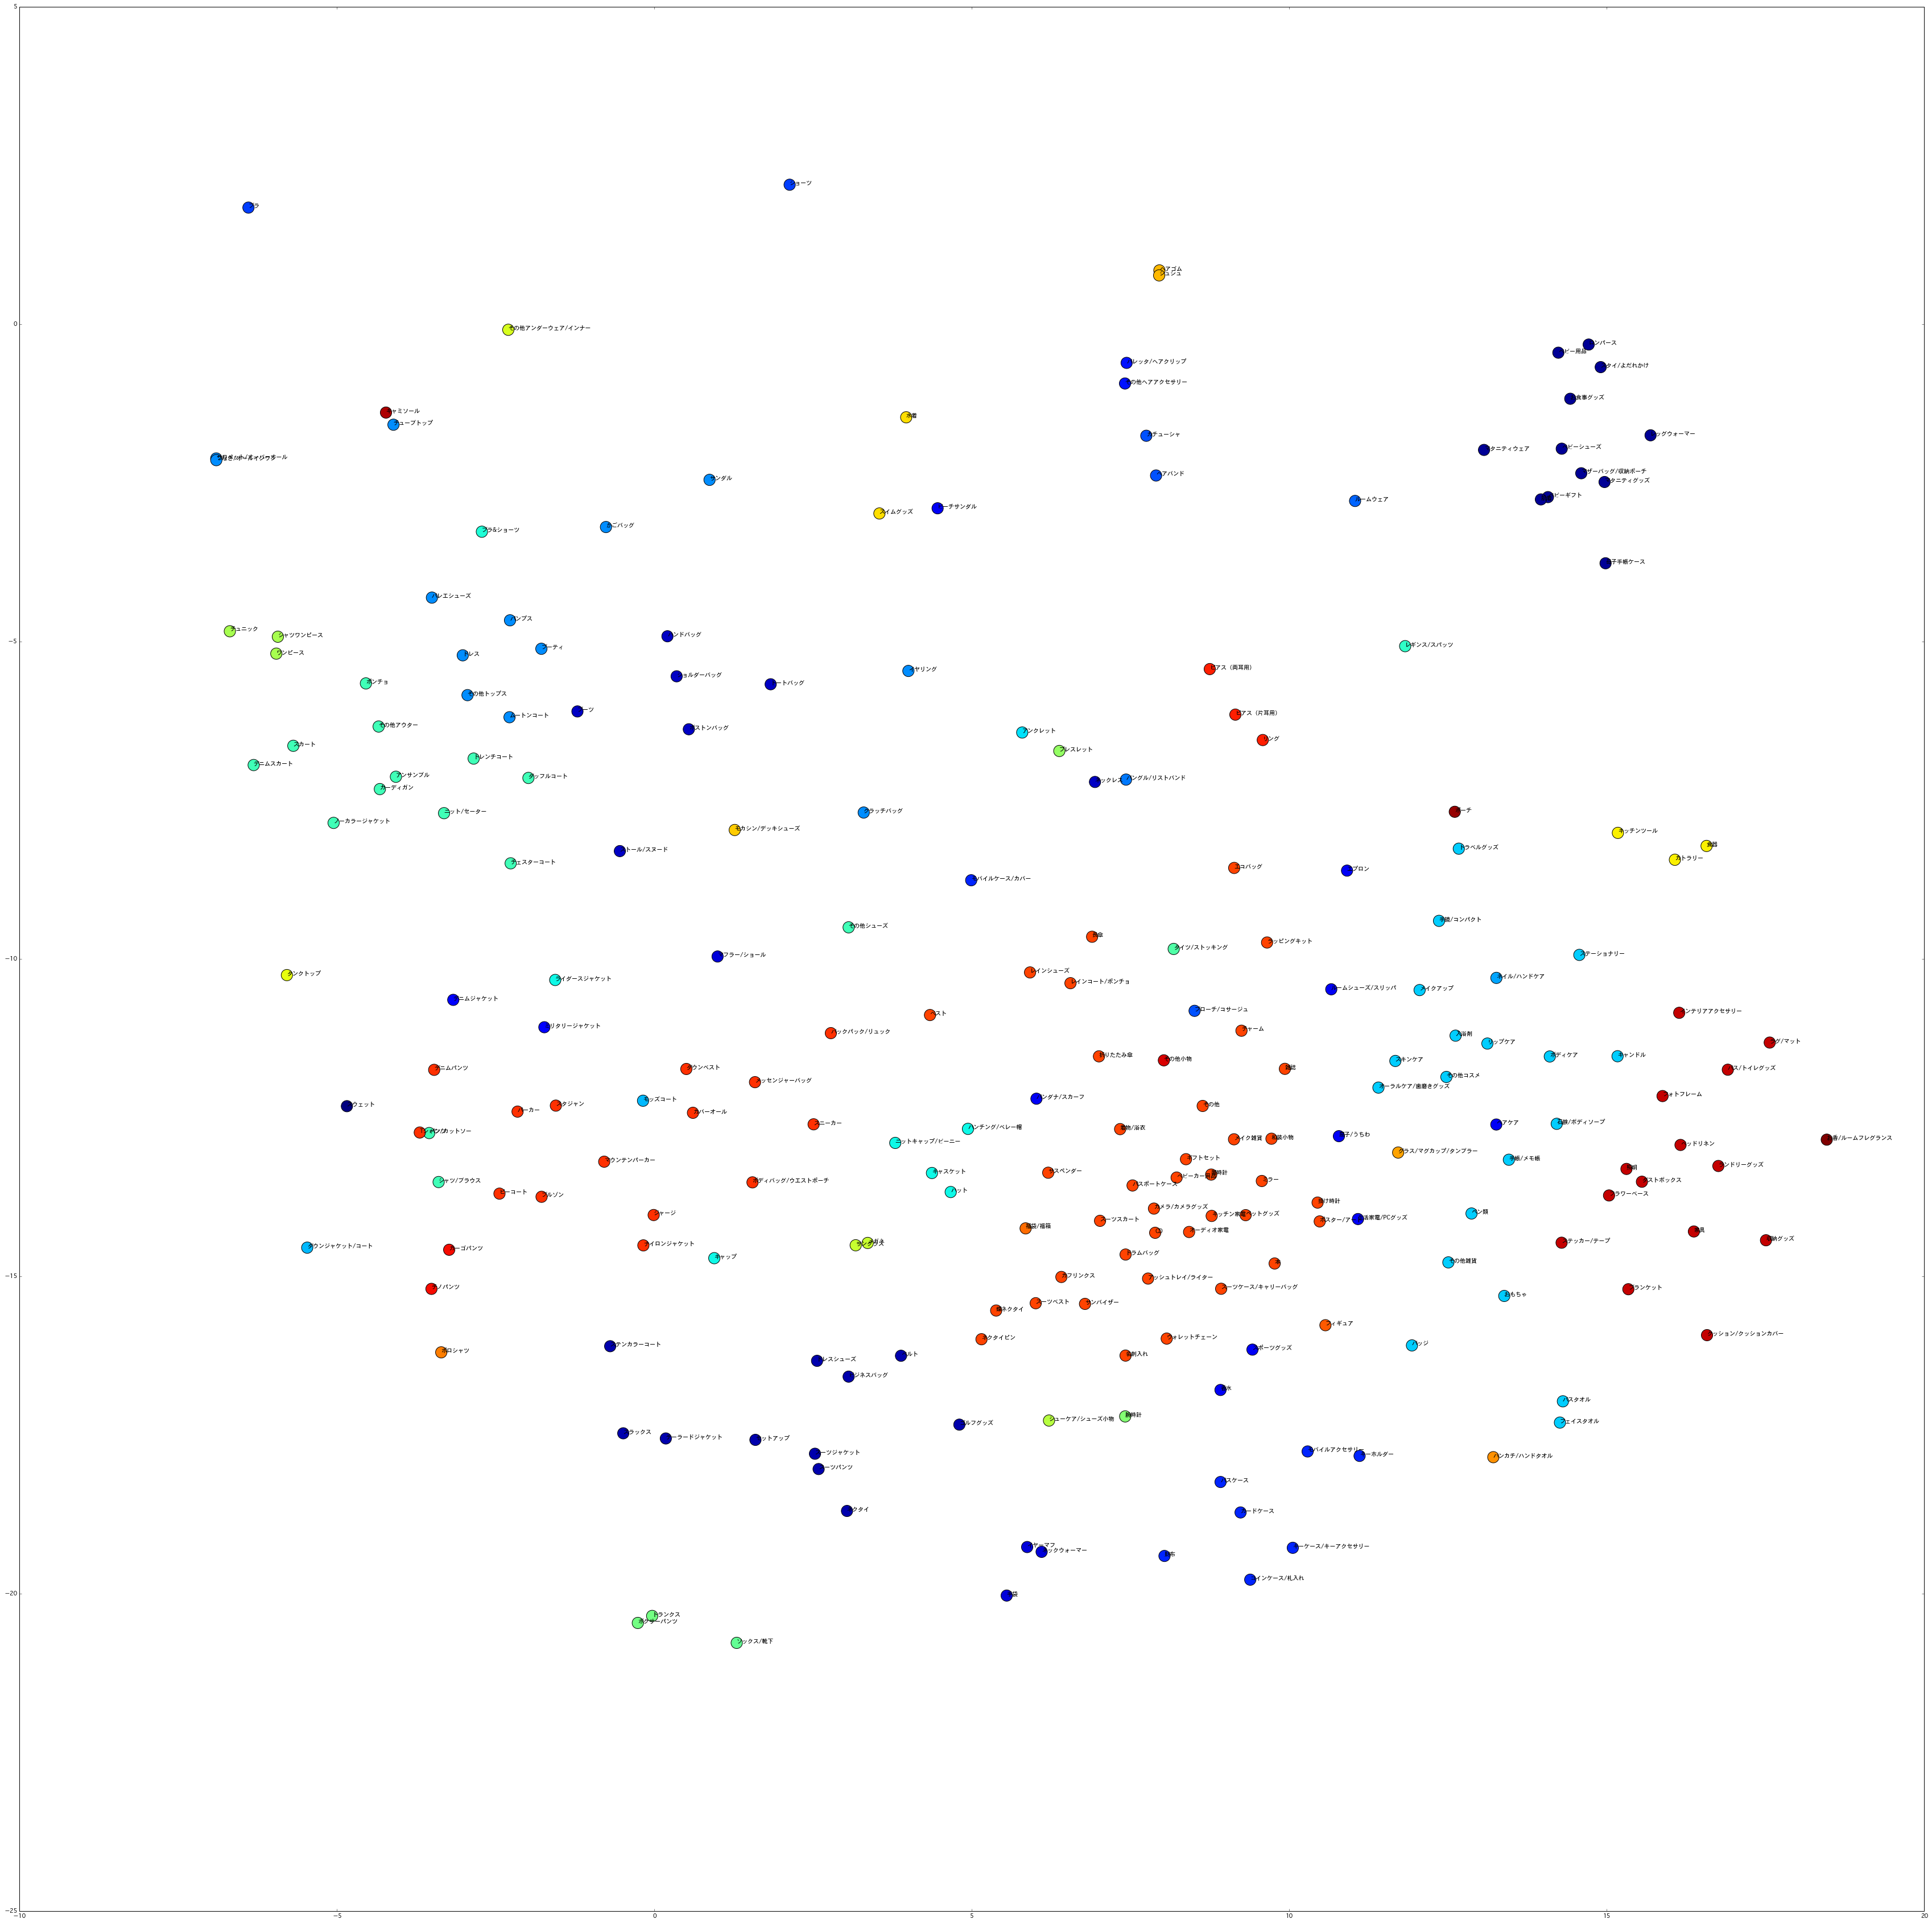

In [44]:
run_tSNE(LEARNING_RATE=300, N_ITER=1000, INIT='pca')

なんか変わった。pcaしないほうがいいのかな単純に。。

### methodを変えてみる'

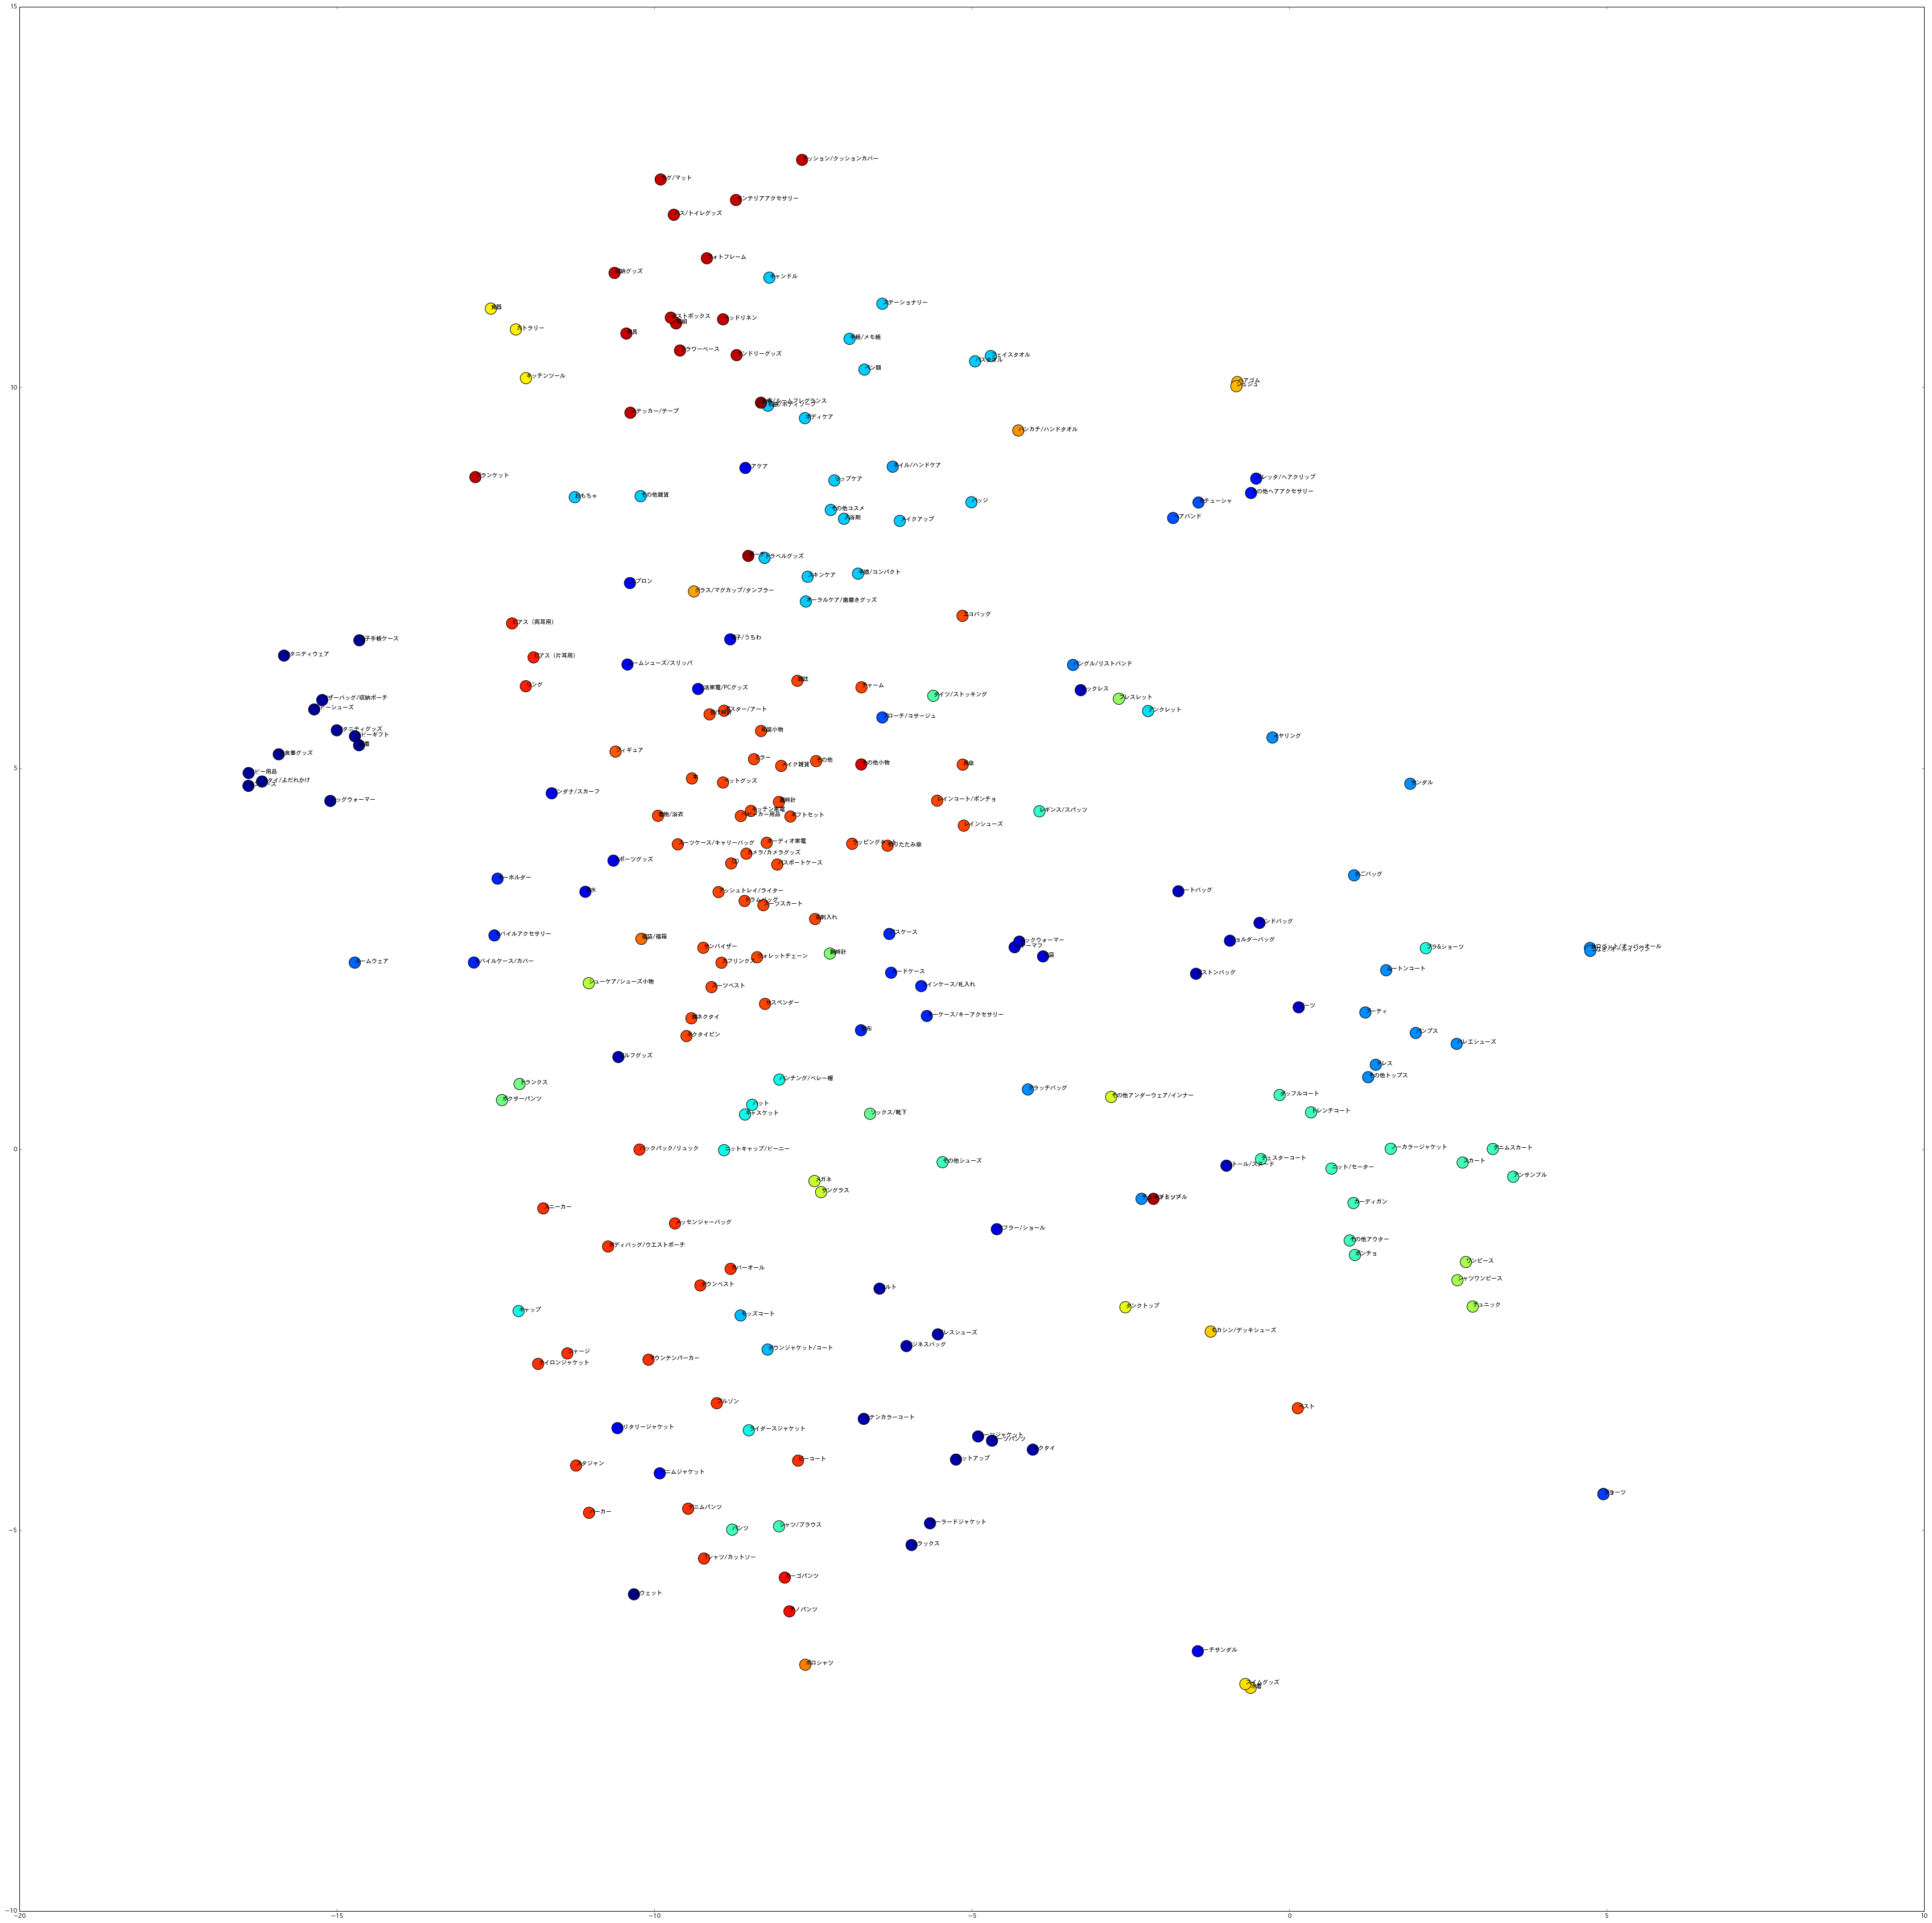

In [45]:
run_tSNE(LEARNING_RATE=300, N_ITER=1000)

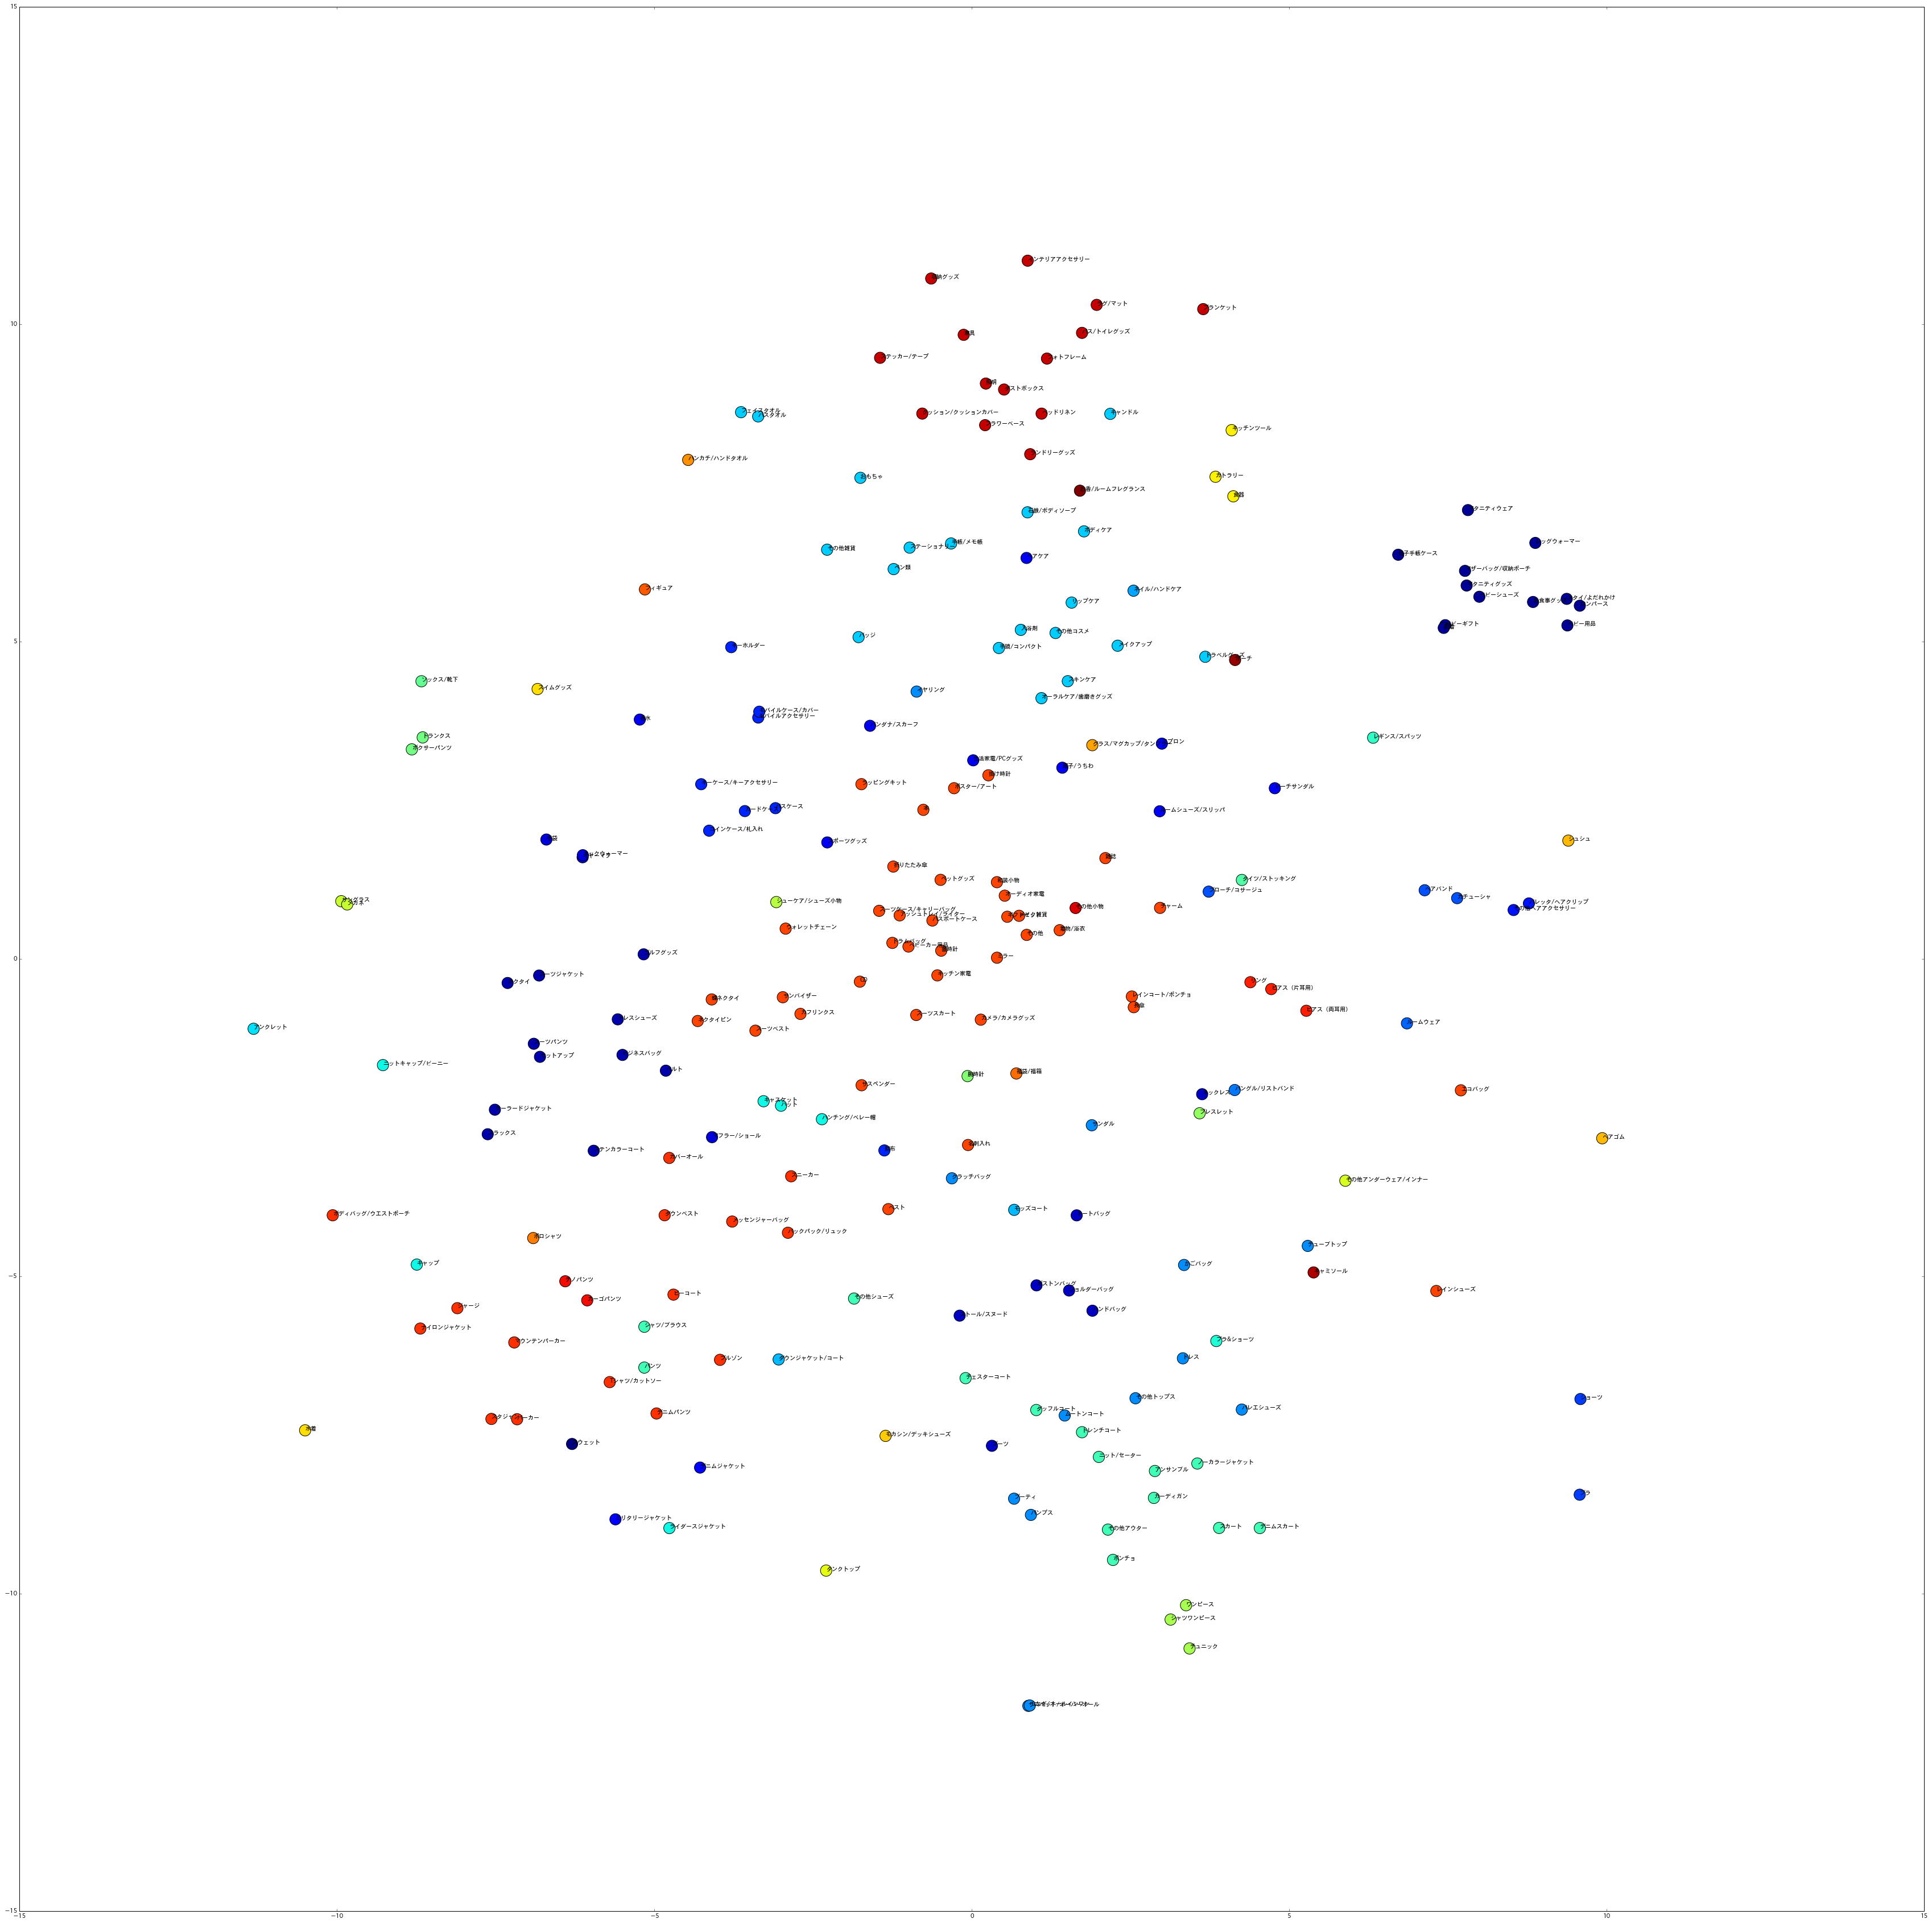

In [46]:
run_tSNE(LEARNING_RATE=300, N_ITER=1000, METHOD='exact')